# Advanced Data Analytics
## NYC Real State Market
### Author: Masood Ahmed

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pandas seaborn numpy plotly

In [2]:
# import the libraries needed
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Terms and their definitions for Reference:
### These definitions are taken from the following website: https://www.nyc.gov/site/finance/taxes/glossary-property-sales.page

- *BOROUGH* : The name of the borough in which the property is located

- *NEIGHBORHOOD* : Department of Finance assessors determine the neighborhood name in the course of valuing properties. The common name of the neighborhood is generally the same as the name Finance designates. However, there may be slight differences in neighborhood boundary lines and some sub-neighborhoods may not be included.

- *BUILDING CLASS CATEGORY* : This is a field that we are including so that users of the Rolling Sales Files can easily identify similar properties by broad usage (e.g. One Family Homes) without looking up individual Building Classes. Files are sorted by Borough, Neighborhood, Building Class Category, Block and Lot.

- *TAX CLASS AT PRESENT* :  Every property in the city is assigned to one of four tax classes (Classes 1, 2, 3, and 4), based on the use of the property.
        Class 1: Includes most residential property of up to three units (such as one-, two-, and three-family homes and small stores or offices with one or two attached apartments), vacant land that is zoned for residential use, and most condominiums that are not more than three stories.
        Class 2: Includes all other property that is primarily residential, such as cooperatives and condominiums.
        Class 3: Includes property with equipment owned by a gas, telephone or electric company.
        Class 4: Includes all other properties not included in class 1,2, and 3, such as offices, factories, warehouses, garage buildings, etc.
        
- *BLOCK* : A Tax Block is a sub-division of the borough on which real properties are located. The Department of Finance uses a Borough-Block-Lot classification to label all real property in the City. “Whereas” addresses describe the street location of a property, the block and lot distinguishes one unit of real property from another, such as the different condominiums in a single building. Also, block and lots are not subject to name changes based on which side of the parcel the building puts its entrance on.

- *LOT* : A Tax Lot is a subdivision of a Tax Block and represents the property unique location.

- *BUILDING CLASS AT PRESENT* : The Building Classification is used to describe a property’s constructive use. The first position of the Building Class is a letter that is used to describe a general class of properties (for example “A” signifies one-family homes, “O” signifies office buildings. “R” signifies condominiums). The second position, a number, adds more specific information about the property’s use or construction style (using our previous examples “A0” is a Cape Cod style one family home, “O4” is a tower type office building and “R5” is a commercial condominium unit). The term Building Class used by the Department of Finance is interchangeable with the term Building Code used by the Department of Buildings.

- *ADDRESS* : The street address of the property as listed on the Sales File. Coop sales include the apartment number in the address field.

- *APARTMENT NUMBER* : The street address of the property as listed on the Sales File. Coop sales include the apartment number in the address field.

-  *ZIP CODE* : The property’s postal code.

- *RESIDENTIAL UNITS* : The number of residential units at the listed property.

- *COMMERCIAL UNITS* : The number of commercial units at the listed property.

- *TOTAL UNITS* : The total number of units at the listed property.

- *LAND SQUARE FEET* : The land area of the property listed in square feet.

- *GROSS SQUARE FEET* : The total area of all the floors of a building as measured from the exterior surfaces of the outside walls of the building, including the land area and space within any building or structure on the property.

- *YEAR BUILT* : Year the structure on the property was built.

- *BUILDING CLASS AT TIME OF SALE* : The Building Classification is used to describe a property’s constructive use. The first position of the Building Class is a letter that is used to describe a general class of properties (for example “A” signifies one-family homes, “O” signifies office buildings. “R” signifies condominiums). The second position, a number, adds more specific information about the property’s use or construction style (using our previous examples “A0” is a Cape Cod style one family home, “O4” is a tower type office building and “R5” is a commercial condominium unit). The term Building Class as used by the Department of Finance is interchangeable with the term Building Code as used by the Department of Buildings.

- *SALE PRICE* : Price paid for the property.

- *SALE DATE* : Date the property sold.

In [3]:
# Loading data and checking basic data type information via head, tail, and info functions of pandas
all_data = pd.read_csv('20to22NYC.csv')
all_data.head(10)

/Users/masoodahmed/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,9,A5,4726 AMBOY ROAD,NaN,10312.0,1.0,0.0,1.0,3067.0,910.0,2002.0,1,A5,0.0,2020-07-02
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,A1,119 LENZIE STREET,NaN,10312.0,1.0,0.0,1.0,8000.0,3660.0,1998.0,1,A1,315000.0,2020-10-02
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,6,A1,118 ELMBANK STREET,NaN,10312.0,1.0,0.0,1.0,6200.0,2580.0,1975.0,1,A1,450000.0,2020-06-24
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,31,A1,7 SANDGAP STREET,NaN,10312.0,1.0,0.0,1.0,2500.0,1222.0,1925.0,1,A2,525000.0,2020-07-02
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,NaN,10312.0,1.0,0.0,1.0,1845.0,1854.0,1986.0,1,A5,480000.0,2020-01-14
5,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,83,A1,7 SEGUINE PLACE,NaN,10312.0,1.0,0.0,1.0,3989.0,2300.0,2004.0,1,A1,720000.0,2020-10-15
6,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,115,A5,44 MAY PLACE,NaN,10312.0,1.0,0.0,1.0,2475.0,2495.0,1986.0,1,A5,0.0,2020-12-11
7,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,124,A5,22 MAY PLACE,NaN,10312.0,1.0,0.0,1.0,2475.0,2495.0,1986.0,1,A5,0.0,2020-09-17
8,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,145,A5,60 SEGUINE PLACE,NaN,10312.0,1.0,0.0,1.0,1471.0,1172.0,1986.0,1,A5,429000.0,2020-11-19
9,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,16,A5,15 EAGAN AVENUE,NaN,10312.0,1.0,0.0,1.0,2550.0,1825.0,1986.0,1,A5,550000.0,2020-10-22


In [4]:
all_data.tail(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
258454,4,WOODSIDE,31 COMMERCIAL VACANT LAND,4,1321,15,V1,43-15 52ND STREET,NaN,11377.0,0,0,0,2000.0,0.0,NaN,4,V1,9650000.0,2021-12-15
258455,4,WOODSIDE,31 COMMERCIAL VACANT LAND,4,1321,16,V1,4315A 52ND STREET,NaN,11377.0,0,0,0,2000.0,0.0,NaN,4,V1,9650000.0,2021-12-15
258456,4,WOODSIDE,31 COMMERCIAL VACANT LAND,4,1321,17,V1,43-13 52ND STREET,NaN,11377.0,0,0,0,4000.0,0.0,NaN,4,V1,9650000.0,2021-12-15
258457,4,WOODSIDE,44 CONDO PARKING,4,1183,1036,RP,"33-30 61ST STREET, P13",P13,11377.0,NaN,1,1,NaN,NaN,2008.0,4,RP,675000.0,2021-08-30
258458,4,WOODSIDE,44 CONDO PARKING,4,1183,1038,RP,"33-30 61ST STREET, P15",P15,11377.0,NaN,1,1,NaN,NaN,2008.0,4,RP,721000.0,2021-09-17
258459,4,WOODSIDE,44 CONDO PARKING,4,1300,1114,RP,"40-45 68TH STREET, P5",P5,11377.0,NaN,1,1,NaN,NaN,2008.0,4,RP,598000.0,2021-10-15
258460,4,WOODSIDE,44 CONDO PARKING,4,1337,1229,RP,"41-52 63RD STREET, P5",P5,11377.0,NaN,1,1,NaN,NaN,2005.0,4,RP,565000.0,2021-08-18
258461,4,WOODSIDE,44 CONDO PARKING,4,2324,1109,RG,"63-14 QUEENS BOULEVARD, P-4",P-4,11377.0,NaN,1,1,NaN,NaN,2008.0,4,RG,23500.0,2021-12-08
258462,4,WOODSIDE,44 CONDO PARKING,4,2324,1152,RG,"63-14 QUEENS BOULEVARD, P-49",P-49,11377.0,NaN,1,1,NaN,NaN,2008.0,4,RG,0.0,2021-09-03
258463,4,WOODSIDE,44 CONDO PARKING,4,2324,1153,RG,"63-14 QUEENS BOULEVARD, P-50",P-50,11377.0,NaN,1,1,NaN,NaN,2008.0,4,RG,0.0,2021-09-03


In [5]:
# getting all columns information
all_data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [6]:
# getting the information
print(all_data.shape) #how many rows and columns?
all_data.info()

(258464, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258464 entries, 0 to 258463
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   BOROUGH                         258464 non-null  int64  
 1   NEIGHBORHOOD                    258464 non-null  object 
 2   BUILDING CLASS CATEGORY         258464 non-null  object 
 3   TAX CLASS AT PRESENT            258143 non-null  object 
 4   BLOCK                           258464 non-null  int64  
 5   LOT                             258464 non-null  int64  
 6   BUILDING CLASS AT PRESENT       258143 non-null  object 
 7   ADDRESS                         258464 non-null  object 
 8   APARTMENT NUMBER                62945 non-null   object 
 9   ZIP CODE                        258445 non-null  float64
 10  RESIDENTIAL UNITS               199349 non-null  object 
 11  COMMERCIAL UNITS                162951 non-null  object 
 12  TOT

## Findings from above step:

- There are 258464 rows and 20 Columns
- Apartment Number has a lot of Null values hence we can will drop that column as percentage of NAN values in that column is extremely high
- TAX CLASS AT PRESENT,YEAR BUILT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET columns has one NAN values as well
- SALE DATE should be a date type instead of a string
- SALE PRICE is a float as it can be categorized as a continuous feature
- ZIP CODE is float but I think it should be a a string as it is not continous

In [7]:
#general summary of dataset
all_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BOROUGH,258464.0,2.982249e+00,1.291469e+00,1.0,2.0,3.0,4.00,5.000000e+00
BLOCK,258464.0,4.205347e+03,3.583534e+03,1.0,1251.0,3273.5,6251.00,1.635000e+04
LOT,258464.0,3.907985e+02,6.638566e+02,1.0,22.0,52.0,1003.00,9.116000e+03
ZIP CODE,258445.0,1.085034e+04,5.627095e+02,10001.0,10305.0,11208.0,11355.00,1.169700e+04
LAND SQUARE FEET,156996.0,6.006378e+03,1.139290e+05,0.0,1900.0,2500.0,3909.25,7.649136e+06
GROSS SQUARE FEET,156996.0,5.488587e+03,4.887278e+04,0.0,1224.0,1810.0,2670.00,8.942176e+06
YEAR BUILT,240618.0,1.952673e+03,3.616212e+01,220.0,1925.0,1950.0,1977.00,2.022000e+03
TAX CLASS AT TIME OF SALE,258464.0,1.636955e+00,7.835365e-01,1.0,1.0,2.0,2.00,4.000000e+00
SALE PRICE,258464.0,1.480856e+06,1.049733e+07,0.0,0.0,550000.0,990000.00,1.033000e+09


In [8]:
# counting the number of NAN in Apartment Number Column
count = all_data['APARTMENT NUMBER'].isna().sum()
print ("NAN count in APARTMENT NUMBER out of 258464: ", count)
print("Which equal to the following percentage: ", (count/258464)*100)

NAN count in APARTMENT NUMBER out of 258464:  195519
Which equal to the following percentage:  75.64651169988858


In [9]:
# Due to large count of NAN in Apartment Number Column, we are dropping it.
all_data.drop(['APARTMENT NUMBER'], axis=1, inplace=True)

# Dropping Zip code as well because we already have the complete address as well the neighbourhood
# Hence the data seems redundant
all_data.drop(['ZIP CODE'], axis=1, inplace=True)

<AxesSubplot:>

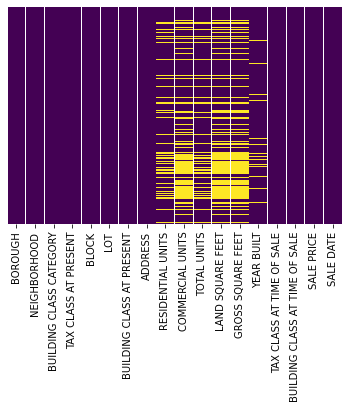

In [10]:
# Using a heatmap to check how is the spread of null values
sns.heatmap(all_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

###  Will now drop the rows that have NAN values so that the data is consistent and error free so that we can use the data for getting out concluions.

In [11]:
# Once again a check of null values
print(all_data[all_data['YEAR BUILT'].isnull()])

        BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
146           5     ANNADALE  05 TAX CLASS 1 VACANT LAND                   1B   
147           5     ANNADALE  05 TAX CLASS 1 VACANT LAND                   1B   
148           5     ANNADALE  05 TAX CLASS 1 VACANT LAND                   1B   
149           5     ANNADALE  05 TAX CLASS 1 VACANT LAND                   1B   
150           5     ANNADALE  05 TAX CLASS 1 VACANT LAND                   1B   
...         ...          ...                         ...                  ...   
258448        4     WOODSIDE       29 COMMERCIAL GARAGES                    4   
258449        4     WOODSIDE       29 COMMERCIAL GARAGES                    4   
258454        4     WOODSIDE   31 COMMERCIAL VACANT LAND                    4   
258455        4     WOODSIDE   31 COMMERCIAL VACANT LAND                    4   
258456        4     WOODSIDE   31 COMMERCIAL VACANT LAND                    4   

        BLOCK  LOT BUILDING

In [12]:
# dropping rows with NAN values and creating a new dataframe 
df = all_data.dropna()

#resetting the index and dropping the extra index column that was generated
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

/Users/masoodahmed/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Converting few columns which are categorical to integer values so that it is easy for further processing and it is also easy for machine to handle values.

In [13]:
# defining functions that might be used for preprocessing  
def convertString(string):
    return int(float(string.replace(',','')))

In [14]:
# Converting the column datatypes to the right form
df['YEAR BUILT']= df['YEAR BUILT'].map(lambda x: int(x))
df['SALE PRICE']= df['SALE PRICE'].map(lambda x: int(x))
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['SALE MONTH']= df['SALE DATE'].dt.month_name()
df['SALE YEAR']= df['SALE DATE'].dt.year
df['GROSS SQUARE FEET']= df['GROSS SQUARE FEET'].map(lambda x: int(x))
df['LAND SQUARE FEET']= df['LAND SQUARE FEET'].map(lambda x: int(x))
df['TOTAL UNITS']= df['TOTAL UNITS'].map(lambda x: str(x))
df['RESIDENTIAL UNITS']= df['RESIDENTIAL UNITS'].map(lambda x: str(x))
df['COMMERCIAL UNITS']= df['COMMERCIAL UNITS'].map(lambda x: str(x))
df['TOTAL UNITS']= df['TOTAL UNITS'].map(lambda x: convertString(x))
df['RESIDENTIAL UNITS']= df['RESIDENTIAL UNITS'].map(lambda x: convertString(x))
df['COMMERCIAL UNITS']= df['COMMERCIAL UNITS'].map(lambda x: convertString(x))

<ipython-input-14-db8ce8f77c0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YEAR BUILT']= df['YEAR BUILT'].map(lambda x: int(x))
<ipython-input-14-db8ce8f77c0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SALE PRICE']= df['SALE PRICE'].map(lambda x: int(x))
<ipython-input-14-db8ce8f77c0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [15]:
# checking the dataset again using the info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148803 entries, 0 to 148802
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   BOROUGH                         148803 non-null  int64         
 1   NEIGHBORHOOD                    148803 non-null  object        
 2   BUILDING CLASS CATEGORY         148803 non-null  object        
 3   TAX CLASS AT PRESENT            148803 non-null  object        
 4   BLOCK                           148803 non-null  int64         
 5   LOT                             148803 non-null  int64         
 6   BUILDING CLASS AT PRESENT       148803 non-null  object        
 7   ADDRESS                         148803 non-null  object        
 8   RESIDENTIAL UNITS               148803 non-null  int64         
 9   COMMERCIAL UNITS                148803 non-null  int64         
 10  TOTAL UNITS                     148803 non-null  int64  

<AxesSubplot:>

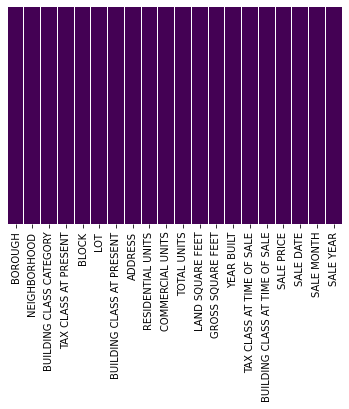

In [16]:
# Checking the null values and quality of the dataset using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5). These are found out from the website: https://www.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

In [17]:
# Naming the Borough's properly
df['BOROUGH'] = df['BOROUGH'].astype(str)
df['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)

<ipython-input-17-7c3dfc13e477>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BOROUGH'] = df['BOROUGH'].astype(str)
/Users/masoodahmed/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [18]:
#create a new column for age of the unit
df['AGE'] = 2023 - df['YEAR BUILT']
df

<ipython-input-18-aa0ea8cbfb62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE'] = 2023 - df['YEAR BUILT']


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,SALE YEAR,AGE
0,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,9,A5,4726 AMBOY ROAD,1,0,...,3067,910,2002,1,A5,0,2020-07-02,July,2020,21
1,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,A1,119 LENZIE STREET,1,0,...,8000,3660,1998,1,A1,315000,2020-10-02,October,2020,25
2,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,6,A1,118 ELMBANK STREET,1,0,...,6200,2580,1975,1,A1,450000,2020-06-24,June,2020,48
3,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,31,A1,7 SANDGAP STREET,1,0,...,2500,1222,1925,1,A2,525000,2020-07-02,July,2020,98
4,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,1,0,...,1845,1854,1986,1,A5,480000,2020-01-14,January,2020,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148798,Queens,WOODSIDE,29 COMMERCIAL GARAGES,4,1156,40,G2,54-11 NORTHERN BOULEVARD,0,8,...,11125,9255,1931,4,G2,0,2021-04-01,April,2021,92
148799,Queens,WOODSIDE,29 COMMERCIAL GARAGES,4,2318,9,G1,47-55 58TH STREET,0,1,...,14250,23000,1929,4,G1,6600000,2021-02-11,February,2021,94
148800,Queens,WOODSIDE,30 WAREHOUSES,4,1210,50,E1,37-15 55TH STREET,0,1,...,2500,3500,1991,4,E1,1700000,2021-12-17,December,2021,32
148801,Queens,WOODSIDE,30 WAREHOUSES,4,1321,12,E1,43-21 52ND STREET,0,1,...,7000,14000,1931,4,E1,9650000,2021-12-15,December,2021,92


### Outliers
Checking for outliers and handling them

In [19]:
df[df['LAND SQUARE FEET']==0]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,SALE YEAR,AGE
147,Staten Island,ANNADALE,46 CONDO STORE BUILDINGS,4,6244,1002,RK,"885 ANNADALE ROAD, 2",0,1,...,0,0,1975,4,RK,0,2020-12-09,December,2020,48
421,Staten Island,ARDEN HEIGHTS,04 TAX CLASS 1 CONDOS,1A,6017,1084,R3,"219 ROLLING HILL GREEN, N/A",1,0,...,0,0,1979,1,R3,325000,2020-06-25,June,2020,44
422,Staten Island,ARDEN HEIGHTS,04 TAX CLASS 1 CONDOS,1A,6017,1090,R3,"144 ROLLING HILL GREEN, N/A",1,0,...,0,0,1979,1,R3,420000,2020-04-17,April,2020,44
423,Staten Island,ARDEN HEIGHTS,04 TAX CLASS 1 CONDOS,1A,6017,1094,R3,"152 ROLLING HILL GREEN, N/A",1,0,...,0,0,1979,1,R3,469000,2020-08-06,August,2020,44
424,Staten Island,ARDEN HEIGHTS,04 TAX CLASS 1 CONDOS,1A,6017,1119,R3,"277 ROLLING HILL GREEN, N/A",1,0,...,0,0,1980,1,R3,455000,2020-07-31,July,2020,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128580,Manhattan,HARLEM-UPPER,11 SPECIAL CONDO BILLING LOTS,2,2094,1203,RR,"3599 BROADWAY, 7D",15,0,...,0,14659,2015,2,RR,86328,2021-11-19,November,2021,8
128762,Manhattan,MIDTOWN EAST,11 SPECIAL CONDO BILLING LOTS,2,1349,1202,RR,"345 EAST 56TH STREET, 5J",45,0,...,0,72456,1981,2,RR,1565000,2021-08-19,August,2021,42
128919,Manhattan,SOHO,11 SPECIAL CONDO BILLING LOTS,2,475,1902,RR,"47 GREENE STREET, 2",1,0,...,0,3560,1900,2,RR,8550000,2021-10-25,October,2021,123
128920,Manhattan,SOHO,11 SPECIAL CONDO BILLING LOTS,2,475,1904,RR,"47 GREENE STREET, 4",1,0,...,0,3556,1900,2,RR,8500000,2021-11-08,November,2021,123


There are 11684 rows where the land square feet is zero.
According to the definition; Land Square Feet is the land area of the property listed in square feet.
Based on the definition, Houses with 0 land square feet are not possible.

In [20]:
df[df['GROSS SQUARE FEET']==0]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,SALE YEAR,AGE
147,Staten Island,ANNADALE,46 CONDO STORE BUILDINGS,4,6244,1002,RK,"885 ANNADALE ROAD, 2",0,1,...,0,0,1975,4,RK,0,2020-12-09,December,2020,48
421,Staten Island,ARDEN HEIGHTS,04 TAX CLASS 1 CONDOS,1A,6017,1084,R3,"219 ROLLING HILL GREEN, N/A",1,0,...,0,0,1979,1,R3,325000,2020-06-25,June,2020,44
422,Staten Island,ARDEN HEIGHTS,04 TAX CLASS 1 CONDOS,1A,6017,1090,R3,"144 ROLLING HILL GREEN, N/A",1,0,...,0,0,1979,1,R3,420000,2020-04-17,April,2020,44
423,Staten Island,ARDEN HEIGHTS,04 TAX CLASS 1 CONDOS,1A,6017,1094,R3,"152 ROLLING HILL GREEN, N/A",1,0,...,0,0,1979,1,R3,469000,2020-08-06,August,2020,44
424,Staten Island,ARDEN HEIGHTS,04 TAX CLASS 1 CONDOS,1A,6017,1119,R3,"277 ROLLING HILL GREEN, N/A",1,0,...,0,0,1980,1,R3,455000,2020-07-31,July,2020,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148146,Queens,WHITESTONE,06 TAX CLASS 1 - OTHER,1,4480,138,G0,148-17 11TH AVENUE,0,0,...,5456,0,1930,1,G0,1120000,2021-05-24,May,2021,93
148147,Queens,WHITESTONE,06 TAX CLASS 1 - OTHER,1,4540,70,G0,12-57 152ND STREET,0,0,...,2525,0,1930,1,G0,900000,2021-09-16,September,2021,93
148761,Queens,WOODSIDE,06 TAX CLASS 1 - OTHER,1,1323,28,G0,43-06A 55TH STREET,0,0,...,2000,0,1950,1,G0,0,2021-05-13,May,2021,73
148762,Queens,WOODSIDE,06 TAX CLASS 1 - OTHER,1,1323,28,G0,4306A 55TH STREET,0,0,...,2000,0,1950,1,G0,0,2021-02-17,February,2021,73


There are 12608 rows where the gross square feet is zero.
Similar to land square feet, it is not possible to have a gross square feet area of zero hence it should be removed.

In [21]:
# Remove outliers by handling 0 land square feet and gross square feet
df = df[df['LAND SQUARE FEET']!=0]
df = df[df['GROSS SQUARE FEET']!=0]

# Confirming removals
df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
BLOCK,136158.00000,5473.86445,3685.34388,1.00000,2623.25000,5024.00000,7661.00000,16330.00000
LOT,136158.00000,65.68407,147.81793,1.00000,19.00000,39.00000,64.00000,9100.00000
RESIDENTIAL UNITS,136158.00000,4.10216,35.34982,0.00000,1.00000,2.00000,2.00000,8764.00000
COMMERCIAL UNITS,136158.00000,0.34105,8.86142,0.00000,0.00000,0.00000,0.00000,2261.00000
TOTAL UNITS,136158.00000,4.44321,36.53474,0.00000,1.00000,2.00000,2.00000,8812.00000
LAND SQUARE FEET,136158.00000,6412.81147,120588.10403,35.00000,2000.00000,2500.00000,4000.00000,7649136.00000
GROSS SQUARE FEET,136158.00000,6289.09993,52309.31434,1.00000,1430.00000,2000.00000,2856.00000,8942176.00000
YEAR BUILT,136158.00000,1941.90783,30.99676,1018.00000,1920.00000,1931.00000,1960.00000,2022.00000
TAX CLASS AT TIME OF SALE,136158.00000,1.23332,0.68366,1.00000,1.00000,1.00000,1.00000,4.00000
SALE PRICE,136158.00000,1187625.56276,10541513.63745,0.00000,0.00000,510000.00000,900000.00000,978090439.00000




There are now a total of 136158 observations in the dataset. Looking at the descirbe table generated above, there is a high chance there might be chance that there are outliers in the SALE Price as well. We can use scatterplot to confirm that.


<AxesSubplot:xlabel='AGE', ylabel='SALE PRICE'>

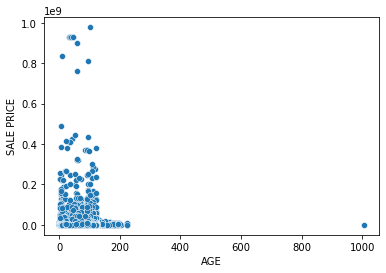

In [22]:
#simple scatter plot to find potential outliers
sns.scatterplot(data=df, x="AGE", y="SALE PRICE")

Scatterplot generated gives an impression that there are outliers. We will remove the outliers for the purpose of analysis. Lets set a limit of $600,000,000

<AxesSubplot:xlabel='AGE', ylabel='SALE PRICE'>

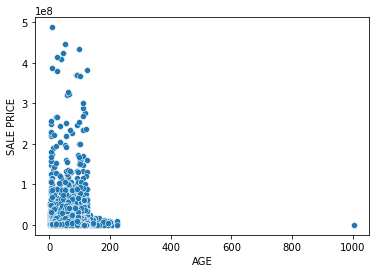

In [23]:
#removing outlier prices by setting a limit of 600000000
df = df[df['SALE PRICE'] <600000000]
sns.scatterplot(data=df, x="AGE", y="SALE PRICE")

### Doing Some More Cleaning :)

Let's start by checking how does the new distribution of the data look like with new parameters limiting sales prices below $ 600,000,000

/Users/masoodahmed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

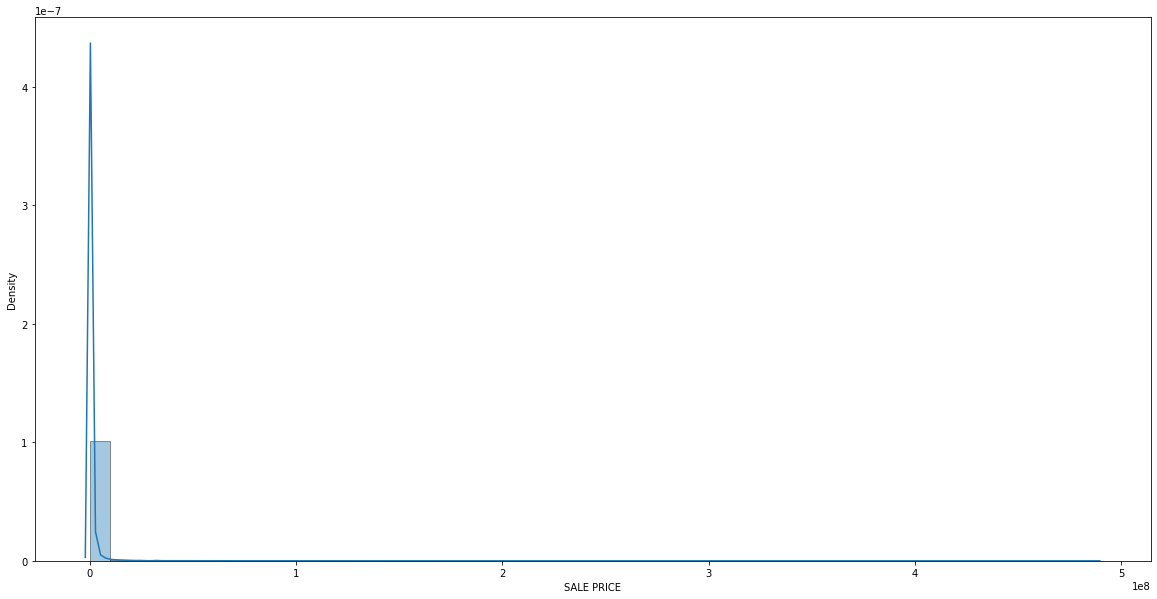

In [24]:
#create distribution plot of housing sale prices below $600,000,000
plt.figure(figsize = (20,10))
sns.distplot(df['SALE PRICE'], kde = True, hist_kws=dict(edgecolor="k"))

It is very crowded below the \\$600,000,000 price point as expected.

In [25]:
#creating new df where SALE PRICE is below $5 mil. 
new_df = df[df['SALE PRICE'] < 5000000]

In [26]:
new_df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
BLOCK,132559.00000,5557.75469,3674.01686,1.00000,2771.00000,5119.00000,7737.00000,16330.00000
LOT,132559.00000,65.81082,145.48136,1.00000,19.00000,39.00000,64.00000,9100.00000
RESIDENTIAL UNITS,132559.00000,3.76054,34.90805,0.00000,1.00000,2.00000,2.00000,8764.00000
COMMERCIAL UNITS,132559.00000,0.28064,8.66451,0.00000,0.00000,0.00000,0.00000,2261.00000
TOTAL UNITS,132559.00000,4.04118,36.05472,0.00000,1.00000,2.00000,2.00000,8812.00000
LAND SQUARE FEET,132559.00000,6101.73727,120042.52729,35.00000,2000.00000,2500.00000,3999.00000,6777433.00000
GROSS SQUARE FEET,132559.00000,5436.56453,50088.53241,1.00000,1412.00000,1974.00000,2750.00000,8942176.00000
YEAR BUILT,132559.00000,1942.10549,30.81599,1018.00000,1920.00000,1931.00000,1960.00000,2022.00000
TAX CLASS AT TIME OF SALE,132559.00000,1.19554,0.62342,1.00000,1.00000,1.00000,1.00000,4.00000
SALE PRICE,132559.00000,573534.52119,736208.39585,0.00000,0.00000,485000.00000,862500.00000,4999999.00000


<AxesSubplot:xlabel='AGE', ylabel='SALE PRICE'>

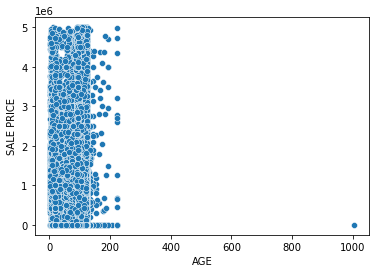

In [27]:
sns.scatterplot(data=new_df, x="AGE", y="SALE PRICE")

/Users/masoodahmed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

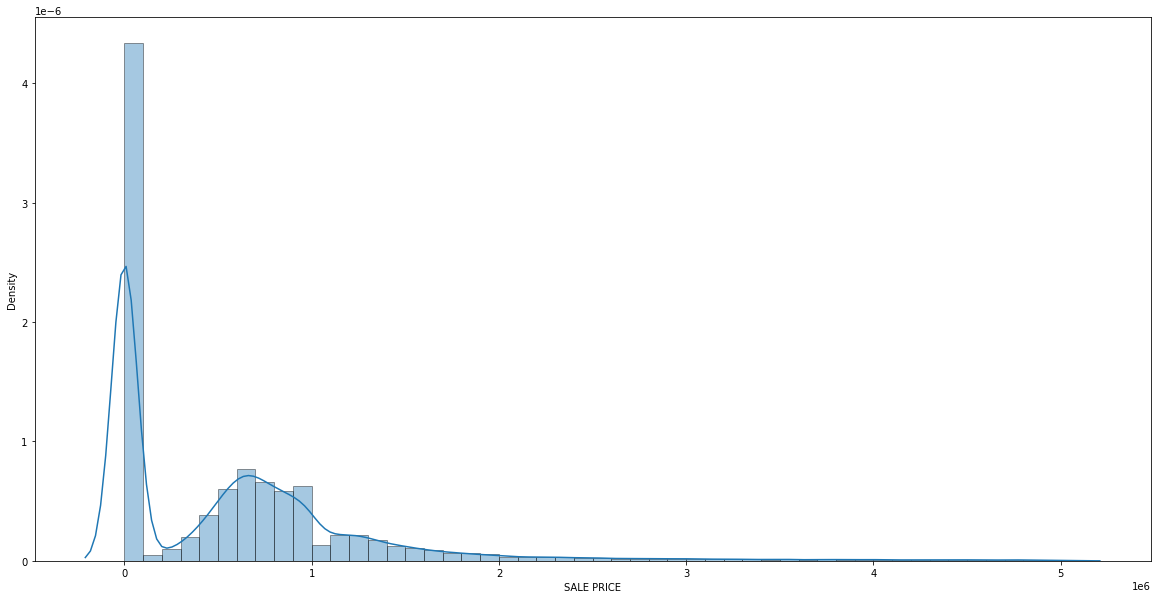

In [28]:
#create distribution plot again
plt.figure(figsize = (20,10))
sns.distplot(new_df['SALE PRICE'], kde = True, hist_kws=dict(edgecolor="k"))

It is giving a better idea of the distribution of sale prices. After removing outliers, the sale price variable appears to be normally distributed and skewed to the right with the exception of the most frequent housing sale price approaching $0.

In [29]:
#create new df where SALE PRICE is not 0 and below $5 mil. 
new_df = df[(df['SALE PRICE'] <5000000) & (df['SALE PRICE'] != 0)] 

In [30]:
#check new df again
new_df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
BLOCK,78885.00000,5611.52414,3706.13196,2.00000,2853.00000,5140.00000,7791.00000,16323.00000
LOT,78885.00000,70.60796,155.74195,1.00000,20.00000,40.00000,65.00000,8001.00000
RESIDENTIAL UNITS,78885.00000,4.39611,44.00854,0.00000,1.00000,1.00000,2.00000,8764.00000
COMMERCIAL UNITS,78885.00000,0.30686,10.19963,0.00000,0.00000,0.00000,0.00000,2261.00000
TOTAL UNITS,78885.00000,4.70297,45.28281,0.00000,1.00000,2.00000,2.00000,8812.00000
LAND SQUARE FEET,78885.00000,7737.67884,155180.82422,110.00000,2000.00000,2500.00000,3999.00000,6777433.00000
GROSS SQUARE FEET,78885.00000,6287.29964,61275.70190,1.00000,1360.00000,1860.00000,2600.00000,8942176.00000
YEAR BUILT,78885.00000,1943.03755,31.42793,1018.00000,1920.00000,1931.00000,1960.00000,2022.00000
TAX CLASS AT TIME OF SALE,78885.00000,1.17855,0.60375,1.00000,1.00000,1.00000,1.00000,4.00000
SALE PRICE,78885.00000,963772.10617,731222.09710,1.00000,575000.00000,785000.00000,1120000.00000,4999999.00000




The new dataframe now incldues properties with sale prices not equal to 0. There are some other potential outliers within the land_square_feet and gross_square_feet categories which may influence the other data points.


<AxesSubplot:xlabel='LAND SQUARE FEET', ylabel='SALE PRICE'>

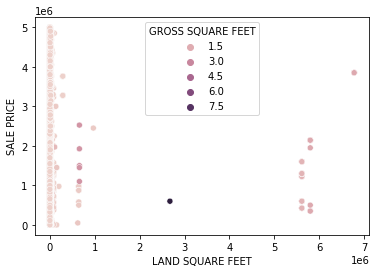

In [31]:
#quick plots of land_square_feet & gross_square_feet against price. 
sns.scatterplot(data=new_df, x="LAND SQUARE FEET", y="SALE PRICE", hue = "GROSS SQUARE FEET")

In [32]:
#creates a filter for LAND SQUARE FEET and GROSS SQUARE FEET where over 1,000,000 SF
land_filt = (new_df["LAND SQUARE FEET"] > 1000000)
gross_filt = (new_df["GROSS SQUARE FEET"] > 1000000)

In [33]:
new_df[land_filt]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,SALE YEAR,AGE
26886,Manhattan,KIPS BAY,08 RENTALS - ELEVATOR APARTMENTS,2,972,1,D7,"525 EAST 14TH STREET, 9G",8764,48,...,2675000,8942176,1945,2,D7,600000,2020-01-07,January,2020,78
40887,Bronx,HUNTS POINT,30 WAREHOUSES,4,2781,500,E9,"355 FOOD CENTER DRIVE, D10",0,10,...,5799632,1598812,1973,4,E9,2142858,2021-10-29,October,2021,50
40888,Bronx,HUNTS POINT,30 WAREHOUSES,4,2781,500,E9,"355 FOOD CENTER DRIVE, D11",0,10,...,5799632,1598812,1973,4,E9,2142858,2021-10-29,October,2021,50
40889,Bronx,HUNTS POINT,30 WAREHOUSES,4,2781,500,E9,"355 FOOD CENTER DRIVE, D5",0,10,...,5799632,1598812,1973,4,E9,357142,2021-10-29,October,2021,50
40890,Bronx,HUNTS POINT,30 WAREHOUSES,4,2781,500,E9,"355 FOOD CENTER DRIVE, D6",0,10,...,5799632,1598812,1973,4,E9,2142858,2021-10-29,October,2021,50
40891,Bronx,HUNTS POINT,30 WAREHOUSES,4,2781,500,E9,"355 FOOD CENTER DRIVE, D7",0,10,...,5799632,1598812,1973,4,E9,2142858,2021-10-29,October,2021,50
40892,Bronx,HUNTS POINT,30 WAREHOUSES,4,2781,500,E9,"355 FOOD CENTER DRIVE, D8",0,10,...,5799632,1598812,1973,4,E9,2142858,2021-10-29,October,2021,50
40893,Bronx,HUNTS POINT,30 WAREHOUSES,4,2781,500,E9,"355 FOOD CENTER DRIVE, D9",0,10,...,5799632,1598812,1973,4,E9,2142858,2021-10-29,October,2021,50
40894,Bronx,HUNTS POINT,30 WAREHOUSES,4,2781,500,E9,"355 FOOD CENTER DRIVE, DPH1",0,10,...,5799632,1598812,1973,4,E9,1950000,2021-08-13,August,2021,50
40895,Bronx,HUNTS POINT,30 WAREHOUSES,4,2781,500,E9,"361 FOOD CENTER DRIVE, B23",0,10,...,5799632,1598812,1973,4,E9,500000,2021-02-26,February,2021,50


In [34]:
new_df[gross_filt]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,SALE YEAR,AGE
26886,Manhattan,KIPS BAY,08 RENTALS - ELEVATOR APARTMENTS,2,972,1,D7,"525 EAST 14TH STREET, 9G",8764,48,...,2675000,8942176,1945,2,D7,600000,2020-01-07,January,2020,78
27760,Manhattan,MIDTOWN EAST,41 TAX CLASS 4 - OTHER,4,1354,1,Z5,"870 UNITED NATIONS, 9E",0,0,...,659375,2400000,1952,4,Z5,1500000,2020-11-30,November,2020,71
40887,Bronx,HUNTS POINT,30 WAREHOUSES,4,2781,500,E9,"355 FOOD CENTER DRIVE, D10",0,10,...,5799632,1598812,1973,4,E9,2142858,2021-10-29,October,2021,50
40888,Bronx,HUNTS POINT,30 WAREHOUSES,4,2781,500,E9,"355 FOOD CENTER DRIVE, D11",0,10,...,5799632,1598812,1973,4,E9,2142858,2021-10-29,October,2021,50
40889,Bronx,HUNTS POINT,30 WAREHOUSES,4,2781,500,E9,"355 FOOD CENTER DRIVE, D5",0,10,...,5799632,1598812,1973,4,E9,357142,2021-10-29,October,2021,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79487,Bronx,HUNTS POINT,41 TAX CLASS 4 - OTHER,4,2770,1,Z9,"410 HALLECK STREET, 433A",0,252,...,5612000,1172005,1960,4,Z9,1600000,2020-04-30,April,2020,63
122035,Manhattan,MIDTOWN EAST,41 TAX CLASS 4 - OTHER,4,1354,1,Z5,"860 UNITED NATIONS PLAZA, 24A",0,0,...,659375,2400000,1952,4,Z5,2525000,2022-01-10,January,2022,71
122036,Manhattan,MIDTOWN EAST,41 TAX CLASS 4 - OTHER,4,1354,1,Z5,"860 UNITED NATIONS, 12C",0,0,...,659375,2400000,1952,4,Z5,1100000,2022-05-16,May,2022,71
128779,Manhattan,MIDTOWN EAST,41 TAX CLASS 4 - OTHER,4,1354,1,Z5,"870 UNITED NATIONS PLAZA, 20B",0,0,...,659375,2400000,1952,4,Z5,1450000,2021-12-06,December,2021,71


A few interesting facts I discovered after creating filters for land and gross square feet of properties larger than 1,000,000 SF.
The Gross Square Feet, as defined by the glossary of terms, is the total area of all the floors of a building as measured from the outer surfaces of the building's outside walls, including the land area and space within any building or structure on the property.


When the above properties are isolated, the findings show that the gross square feet area is LESS than the total land square feet area, which should not be the case. 

In [35]:
# creating a new_df
new_df = df[(df['SALE PRICE'] <5000000) #limit up to $5,000,000 
                       & (df['SALE PRICE'] > 1000) #removes all properties less than $1,000
                       & (df['RESIDENTIAL UNITS'] < 500) #limit up to 500 units
                       & (df['COMMERCIAL UNITS'] < 500) #limit up to 500 units
                       & (df['LAND SQUARE FEET'] < df['GROSS SQUARE FEET']) #removes instances where land sf is greater than gross sf
                       & (df['GROSS SQUARE FEET'] < 2530) #removes instances where gross sf is greater than 2530 SF
                       & (df['GROSS SQUARE FEET'] > 120)] #removes instances where gross sf is less than 120 SF





Additionally, Let's remove any duplicate values that might exist.


In [36]:
#remove duplicates
new_df.drop_duplicates()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,SALE YEAR,AGE
4,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,1,0,...,1845,1854,1986,1,A5,480000,2020-01-14,January,2020,37
21,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,1,6219,14,A5,90 LORRAINE AVENUE,1,0,...,1650,1700,2004,1,A5,580000,2020-05-01,May,2020,19
157,Staten Island,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5725,26,A5,135 KENILWORTH AVENUE,1,0,...,1135,1540,1995,1,A5,375000,2020-01-13,January,2020,28
162,Staten Island,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5727,30,A5,82 KENILWORTH AVENUE,1,0,...,1230,1540,1995,1,A5,435000,2020-08-28,August,2020,28
174,Staten Island,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5740,11,A5,69 ILYSSA WAY,1,0,...,500,1354,1996,1,A5,380000,2020-06-09,June,2020,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148705,Queens,WOODSIDE,02 TWO FAMILY DWELLINGS,1,1340,54,B1,42-28 64TH STREET,2,0,...,1980,2160,1930,1,B1,500000,2021-04-17,April,2021,93
148706,Queens,WOODSIDE,02 TWO FAMILY DWELLINGS,1,1340,54,B1,42-28 64TH STREET,2,0,...,1980,2160,1930,1,B1,950000,2021-02-05,February,2021,93
148713,Queens,WOODSIDE,02 TWO FAMILY DWELLINGS,1,2327,50,B1,48-34 58 LANE,2,0,...,1368,1798,1950,1,B1,870000,2021-09-20,September,2021,73
148714,Queens,WOODSIDE,02 TWO FAMILY DWELLINGS,1,2327,57,B1,48-46 58TH LANE,2,0,...,1206,1798,1950,1,B1,810000,2021-01-25,January,2021,73


In [37]:
#check new df again
new_df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
BLOCK,7245.00000,4428.59227,2821.83226,23.00000,1963.00000,4133.00000,6069.00000,16214.00000
LOT,7245.00000,66.06653,114.51482,1.00000,21.00000,43.00000,71.00000,2794.00000
RESIDENTIAL UNITS,7245.00000,1.76756,0.76619,0.00000,1.00000,2.00000,2.00000,11.00000
COMMERCIAL UNITS,7245.00000,0.09786,0.35162,0.00000,0.00000,0.00000,0.00000,4.00000
TOTAL UNITS,7245.00000,1.86542,0.75961,0.00000,1.00000,2.00000,2.00000,11.00000
LAND SQUARE FEET,7245.00000,1615.82195,446.75498,250.00000,1339.00000,1732.00000,2000.00000,2500.00000
GROSS SQUARE FEET,7245.00000,1987.02664,391.42431,500.00000,1776.00000,2064.00000,2280.00000,2529.00000
YEAR BUILT,7245.00000,1940.12560,35.38062,1800.00000,1910.00000,1930.00000,1960.00000,2020.00000
TAX CLASS AT TIME OF SALE,7245.00000,1.09110,0.47984,1.00000,1.00000,1.00000,1.00000,4.00000
SALE PRICE,7245.00000,982951.34051,654021.16083,1500.00000,565000.00000,829000.00000,1200000.00000,4999000.00000


/Users/masoodahmed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

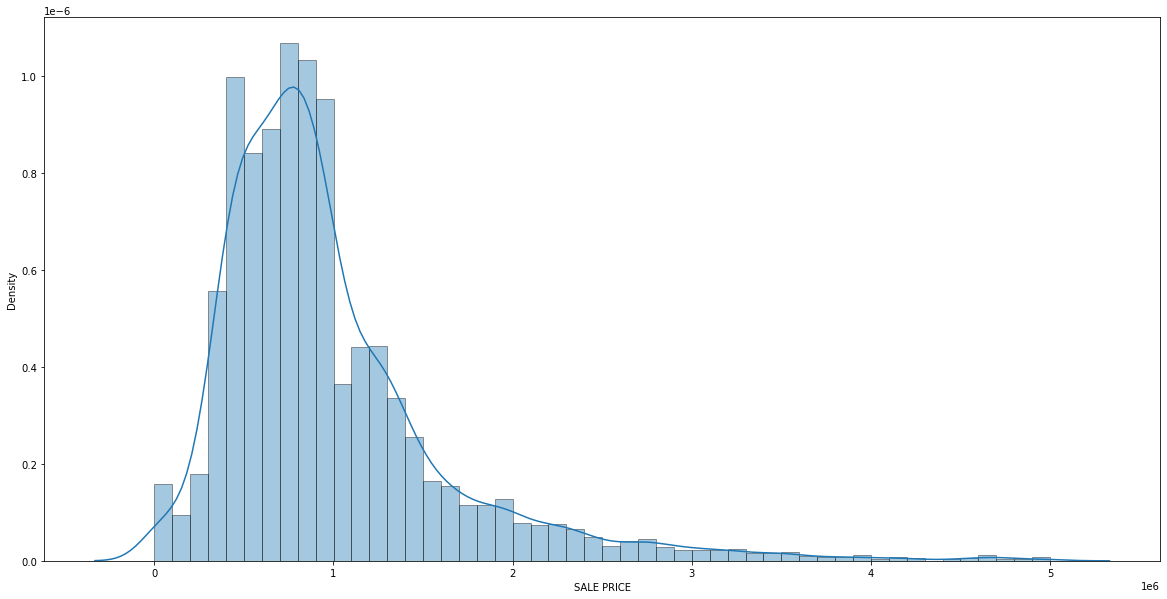

In [38]:
#create distribution plot of property sale prices
plt.figure(figsize = (20,10))
sns.distplot(new_df['SALE PRICE'], kde = True, hist_kws=dict(edgecolor="k"))

In [39]:
# Converting some features to categorical datatype
new_df['NEIGHBORHOOD'] = new_df['NEIGHBORHOOD'].astype('category')
new_df['BUILDING CLASS CATEGORY'] = new_df['BUILDING CLASS CATEGORY'].astype('category')
new_df['TAX CLASS AT PRESENT'] = new_df['TAX CLASS AT PRESENT'].astype('category')
new_df['BLOCK'] = new_df['BLOCK'].astype('category')
new_df['LOT'] = new_df['LOT'].astype('category')
new_df['BUILDING CLASS AT PRESENT'] = new_df['BUILDING CLASS AT PRESENT'].astype('category')
new_df['ADDRESS'] = new_df['ADDRESS'].astype('category')
new_df['TAX CLASS AT TIME OF SALE'] = new_df['TAX CLASS AT TIME OF SALE'].astype('category')

<ipython-input-39-9d2af71ca47f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['NEIGHBORHOOD'] = new_df['NEIGHBORHOOD'].astype('category')
<ipython-input-39-9d2af71ca47f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['BUILDING CLASS CATEGORY'] = new_df['BUILDING CLASS CATEGORY'].astype('category')
<ipython-input-39-9d2af71ca47f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [40]:
#resetting the index and dropping the extra index column that was generated
new_df.reset_index(inplace=True)
new_df.drop(['index'], axis=1, inplace=True)

/Users/masoodahmed/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
#check datatypes
new_df.dtypes

BOROUGH                                   object
NEIGHBORHOOD                            category
BUILDING CLASS CATEGORY                 category
TAX CLASS AT PRESENT                    category
BLOCK                                   category
LOT                                     category
BUILDING CLASS AT PRESENT               category
ADDRESS                                 category
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                           int64
GROSS SQUARE FEET                          int64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE               category
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                                 int64
SALE DATE                         datetime64[ns]
SALE MONTH                                object
SALE YEAR                                  int64
AGE                 

In [42]:
new_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,SALE YEAR,AGE
0,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,1,0,...,1845,1854,1986,1,A5,480000,2020-01-14,January,2020,37
1,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,1,6219,14,A5,90 LORRAINE AVENUE,1,0,...,1650,1700,2004,1,A5,580000,2020-05-01,May,2020,19
2,Staten Island,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5725,26,A5,135 KENILWORTH AVENUE,1,0,...,1135,1540,1995,1,A5,375000,2020-01-13,January,2020,28
3,Staten Island,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5727,30,A5,82 KENILWORTH AVENUE,1,0,...,1230,1540,1995,1,A5,435000,2020-08-28,August,2020,28
4,Staten Island,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5740,11,A5,69 ILYSSA WAY,1,0,...,500,1354,1996,1,A5,380000,2020-06-09,June,2020,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7240,Queens,WOODSIDE,02 TWO FAMILY DWELLINGS,1,1340,54,B1,42-28 64TH STREET,2,0,...,1980,2160,1930,1,B1,500000,2021-04-17,April,2021,93
7241,Queens,WOODSIDE,02 TWO FAMILY DWELLINGS,1,1340,54,B1,42-28 64TH STREET,2,0,...,1980,2160,1930,1,B1,950000,2021-02-05,February,2021,93
7242,Queens,WOODSIDE,02 TWO FAMILY DWELLINGS,1,2327,50,B1,48-34 58 LANE,2,0,...,1368,1798,1950,1,B1,870000,2021-09-20,September,2021,73
7243,Queens,WOODSIDE,02 TWO FAMILY DWELLINGS,1,2327,57,B1,48-46 58TH LANE,2,0,...,1206,1798,1950,1,B1,810000,2021-01-25,January,2021,73


## Description of target dataset:
Hence, after all the preprocessing and handling all the null values and converting all the dataset, our target dataset is in the variable new_df. In our target dataset, we have removed some unnecessary columns and have removed the rows with NA. We have also created some new columns such as SALE YEAR, SALE MONTH, and AGE so that we can use them in future analysis. Moreover, we have also handled the outliers which were existing sale price and some unusal values in the columns of LAND SQUARE FEET and GROSS SQUARE FEET.

## Some Questions to lead the analysis :

#### 1. Is borough and neighborhood which represents location is affecting the sales of NYC property or not (during the pandemic times) ? And how each is effect it? This question is would be interesting to explore because it will provide us with a clear picture regarding how things were during the pandemic.
#### 2. What is the mean sales price in each borough and how it changed during the COVID years? This question is interesting because this question will also how people responeded to new changes during the COVID19.
#### 3. What area's we should focus on to increase our sales post covid? This question is interesting to answer because it will allow us to focus on the right areas post covid situation.
#### 4. Were there were less commercial units being purchased during the covid and it increased post-covid19? This question is also interesting to answer in this context because it will tell us what was the intensity of the shift of work from home during the COVID19 and it has been recovered?

### Summary of insights gotten by data and statistical analysis. (Please refer to the graphs and plotting below these to get a clear picture)

1) Yes, the borough and neighborhood location has an impact on the sales of NYC properties. The data shows that Manhattan has the most expensive sale prices among the boroughs, with Brooklyn and Queens following as the second and third most expensive areas, respectively. The most expensive neighborhoods, in terms of average property price, are Park Slope South, Bedford Stuyvesant, and Astoria. This suggests that the location of the property can affect its sale price. Additionally, the data indicates that Residential Units were mostly sold in Manhattan, with Commercial Units also mostly being sold in Manhattan, which further emphasizes the role of location in property sales.

2) The information found out does indicate that Manhattan has the most expensive sale prices among the boroughs, with Brooklyn and Queens following as the second and third most expensive areas. The median sale prices have been increasing from 2020 to 2022, which suggests that the overall mean sales price has likely increased during these years.

3) Based on the information that Residential Units were mostly sold in Manhattan and that the median sale prices have been increasing from 2020 to 2022, it may be worth considering focusing on the Manhattan area for potential sales growth. Additionally, the correlation between the gross square footage of a property and the sale price suggests that properties with a larger area may have higher sale prices, so this could be another factor to consider when looking to increase sales.

4) There was a decrease in the number of commercial units sold from 2020 to 2022 due to the pandemic. However, it also mentions that there has been an increase in the number of residential units sold in 2022, post-pandemic.

#### Below are the analysis that has been done to get the above conclusions.

## Plots of Categorical Features VS. Sales Price

In [43]:
# Basic Conclusion
df_part2 = new_df.copy()
df_part2['NEIGHBORHOOD'].value_counts().count()

201

We have 201 different NEIGHBORHOOD

In [44]:
# Identify categorical features again
df_part2.select_dtypes(['category']).columns

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT', 'ADDRESS',
       'TAX CLASS AT TIME OF SALE'],
      dtype='object')

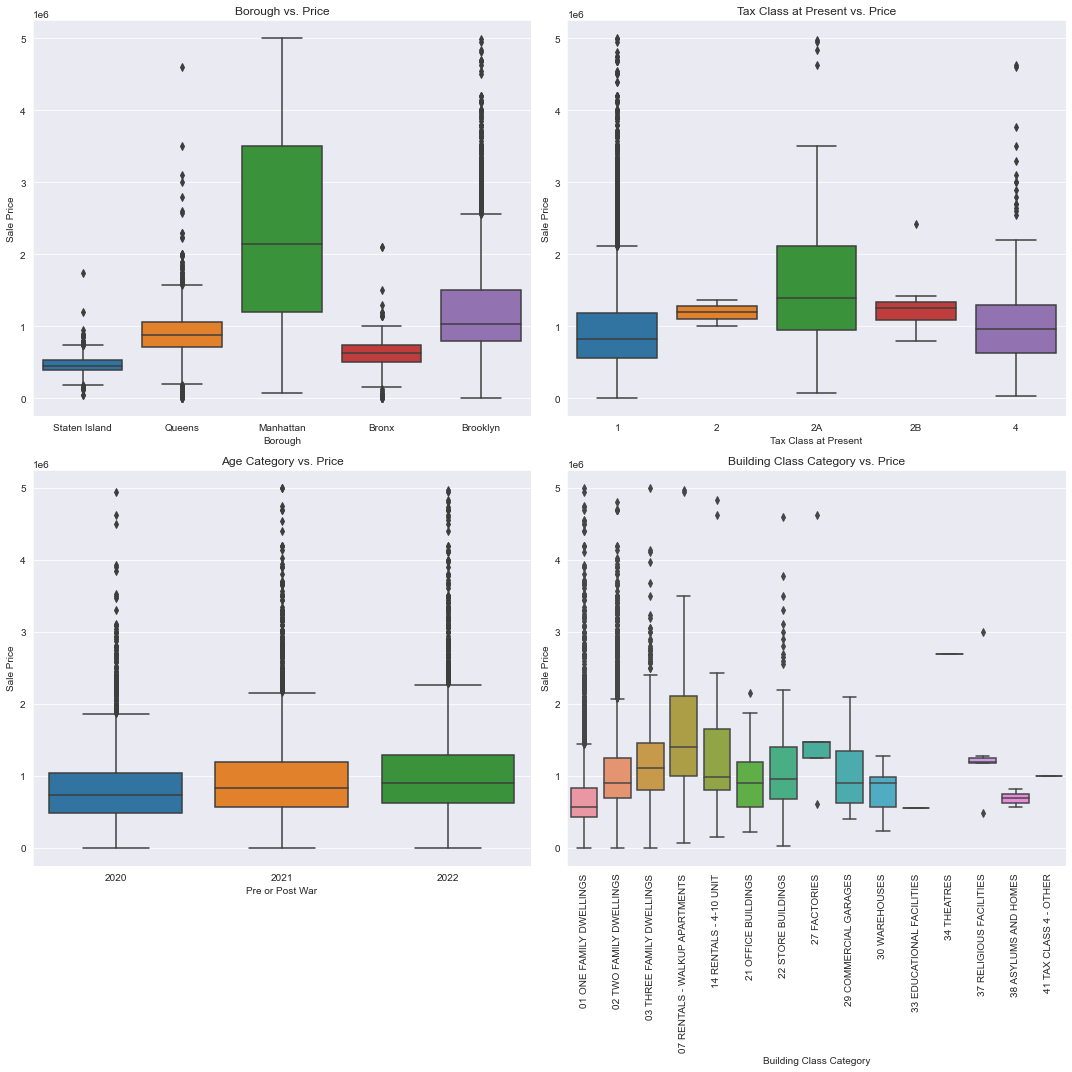

In [45]:

# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

#create order variable to plot unique values only
order_tax = sorted(new_df['TAX CLASS AT PRESENT'].unique())
order_class = sorted(new_df['BUILDING CLASS CATEGORY'].unique())


#plot of borough category vs price
sns.boxplot(x = 'BOROUGH', y = 'SALE PRICE', data = new_df, ax = axes[0,0])
axes[0,0].set_xlabel('Borough')
axes[0,0].set_ylabel('Sale Price')
axes[0,0].set_title('Borough vs. Price')

#plot of tax class at present vs price
sns.boxplot(x = 'TAX CLASS AT PRESENT', y = 'SALE PRICE', data = new_df, ax = axes[0,1], order = order_tax)
axes[0,1].set_xlabel('Tax Class at Present')
axes[0,1].set_ylabel('Sale Price')
axes[0,1].set_title('Tax Class at Present vs. Price')

#plot of age classification category vs price
sns.boxplot(x = 'SALE YEAR', y = 'SALE PRICE', data = new_df, ax = axes[1,0])
axes[1,0].set_xlabel('Pre or Post War')
axes[1,0].set_ylabel('Sale Price')
axes[1,0].set_title('Age Category vs. Price')

#plot of building class categories vs price
sns.boxplot(x = 'BUILDING CLASS CATEGORY', y = 'SALE PRICE', data = new_df, ax = axes[1,1], order = order_class)
axes[1,1].set_xlabel('Building Class Category')
axes[1,1].set_ylabel('Sale Price')
axes[1,1].set_title('Building Class Category vs. Price')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [46]:
#create new list called 'neighborhood' with top 20 most expensive average sale prices
from collections import Counter
neighborhood = list(dict(Counter(df_part2["NEIGHBORHOOD"]).most_common(20)).keys())

avg_sale_prices = []
for i in neighborhood:
    avg_price = np.mean(new_df["SALE PRICE"][df_part2["NEIGHBORHOOD"] == i])
    avg_sale_prices.append(avg_price)


Text(0.5, 1.0, 'Average Property Price in the Top 20 Neighborhoods')

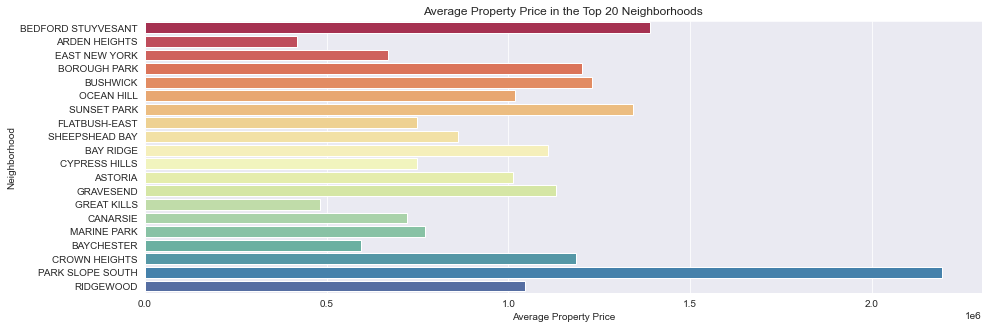

In [47]:
#plot most expensive neighborhoods with highest average property price
plt.figure(figsize=(15,5))

ax = sns.barplot(x= avg_sale_prices, y= neighborhood , ci=None, palette = "Spectral")
ax.set_xlabel('Average Property Price')
ax.set_ylabel('Neighborhood')
plt.title('Average Property Price in the Top 20 Neighborhoods')


### Insights

- All boroughs (with the exception of Manhattan) consist of properties with a similar price for properties. Manhattan has the most expensive sale prices. Brooklyn comes in second with a median price, and Queens in third.

- Tax Classes have approximately same median prices.

- The most expensive neighborhood average price of a property is Park Slope South followed by Bedford Stuyvesant and Astoria.


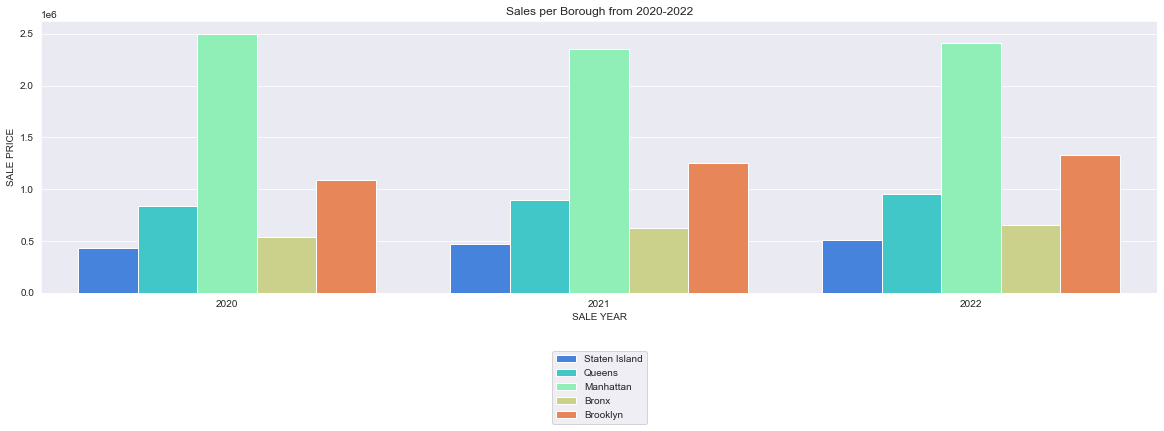

In [48]:
plt.figure(figsize=(20,5))
sns.barplot(x='SALE YEAR', y='SALE PRICE', hue='BOROUGH', data=df_part2, palette='rainbow', ci=None)
plt.title('Sales per Borough from 2020-2022')
plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.5))

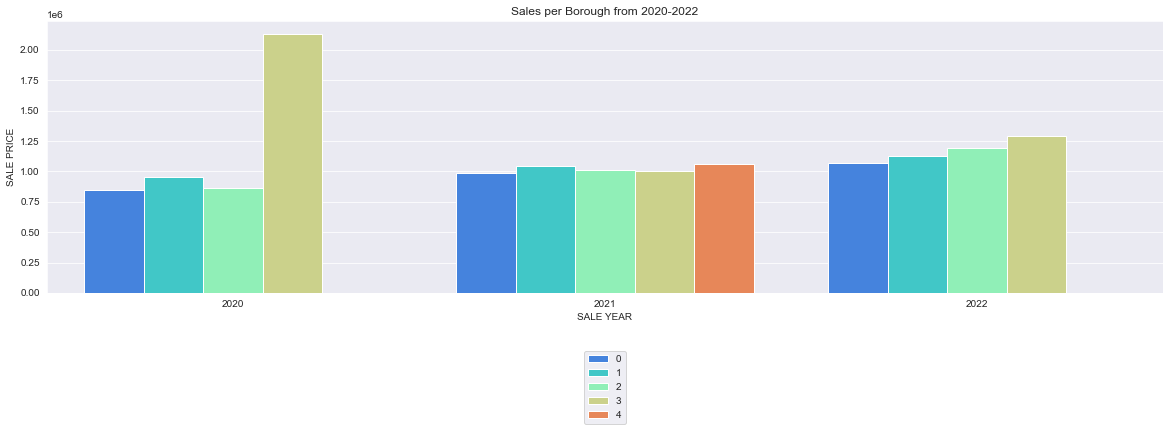

In [49]:
plt.figure(figsize=(20,5))
sns.barplot(x='SALE YEAR', y='SALE PRICE', hue='COMMERCIAL UNITS', data=df_part2, palette='rainbow', ci=None)
plt.title('Sales per Borough from 2020-2022')
plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.5))

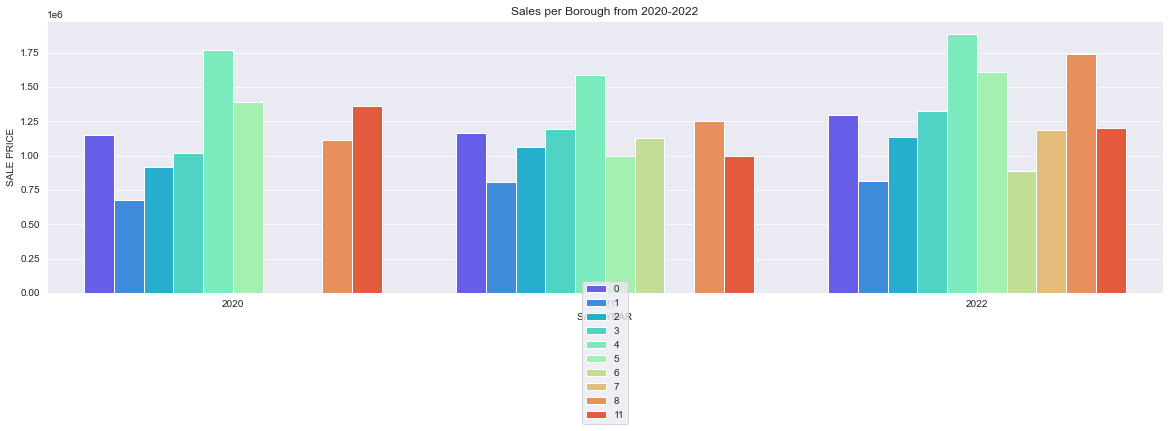

In [50]:
plt.figure(figsize=(20,5))
sns.barplot(x='SALE YEAR', y='SALE PRICE', hue='RESIDENTIAL UNITS', data=df_part2, palette='rainbow', ci=None)
plt.title('Sales per Borough from 2020-2022')
plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.5))

###  Plots of Numerical Features VS. Sales Price

Text(0.5, 1.0, 'Residential Units vs Sale Price')

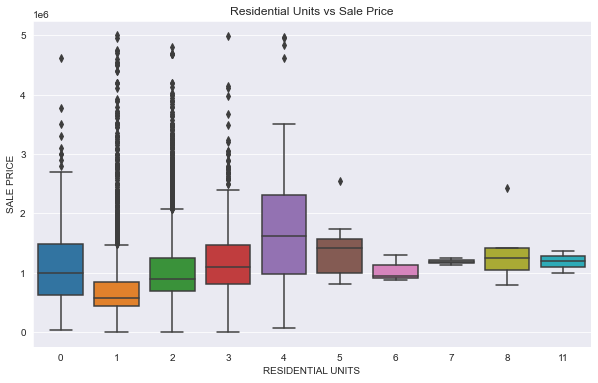

In [51]:
#plot residential units
plt.figure(figsize=(10,6))
sns.boxplot(x='RESIDENTIAL UNITS', y="SALE PRICE", data=df_part2)
plt.title('Residential Units vs Sale Price')

The median sale price generally constant.

Text(0.5, 1.0, 'Commercial Units vs Sale Price')

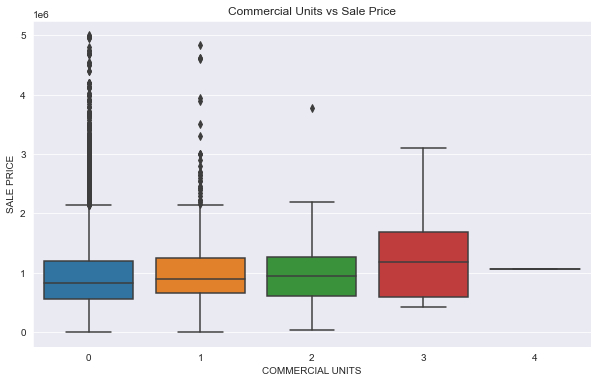

In [52]:
#plot commercial units
plt.figure(figsize=(10,6))
sns.boxplot(x='COMMERCIAL UNITS', y="SALE PRICE", data=df_part2)
plt.title('Commercial Units vs Sale Price')

Sale prices for commercial units also seem to be constant.

Text(0.5, 1.0, 'Age vs. Price')

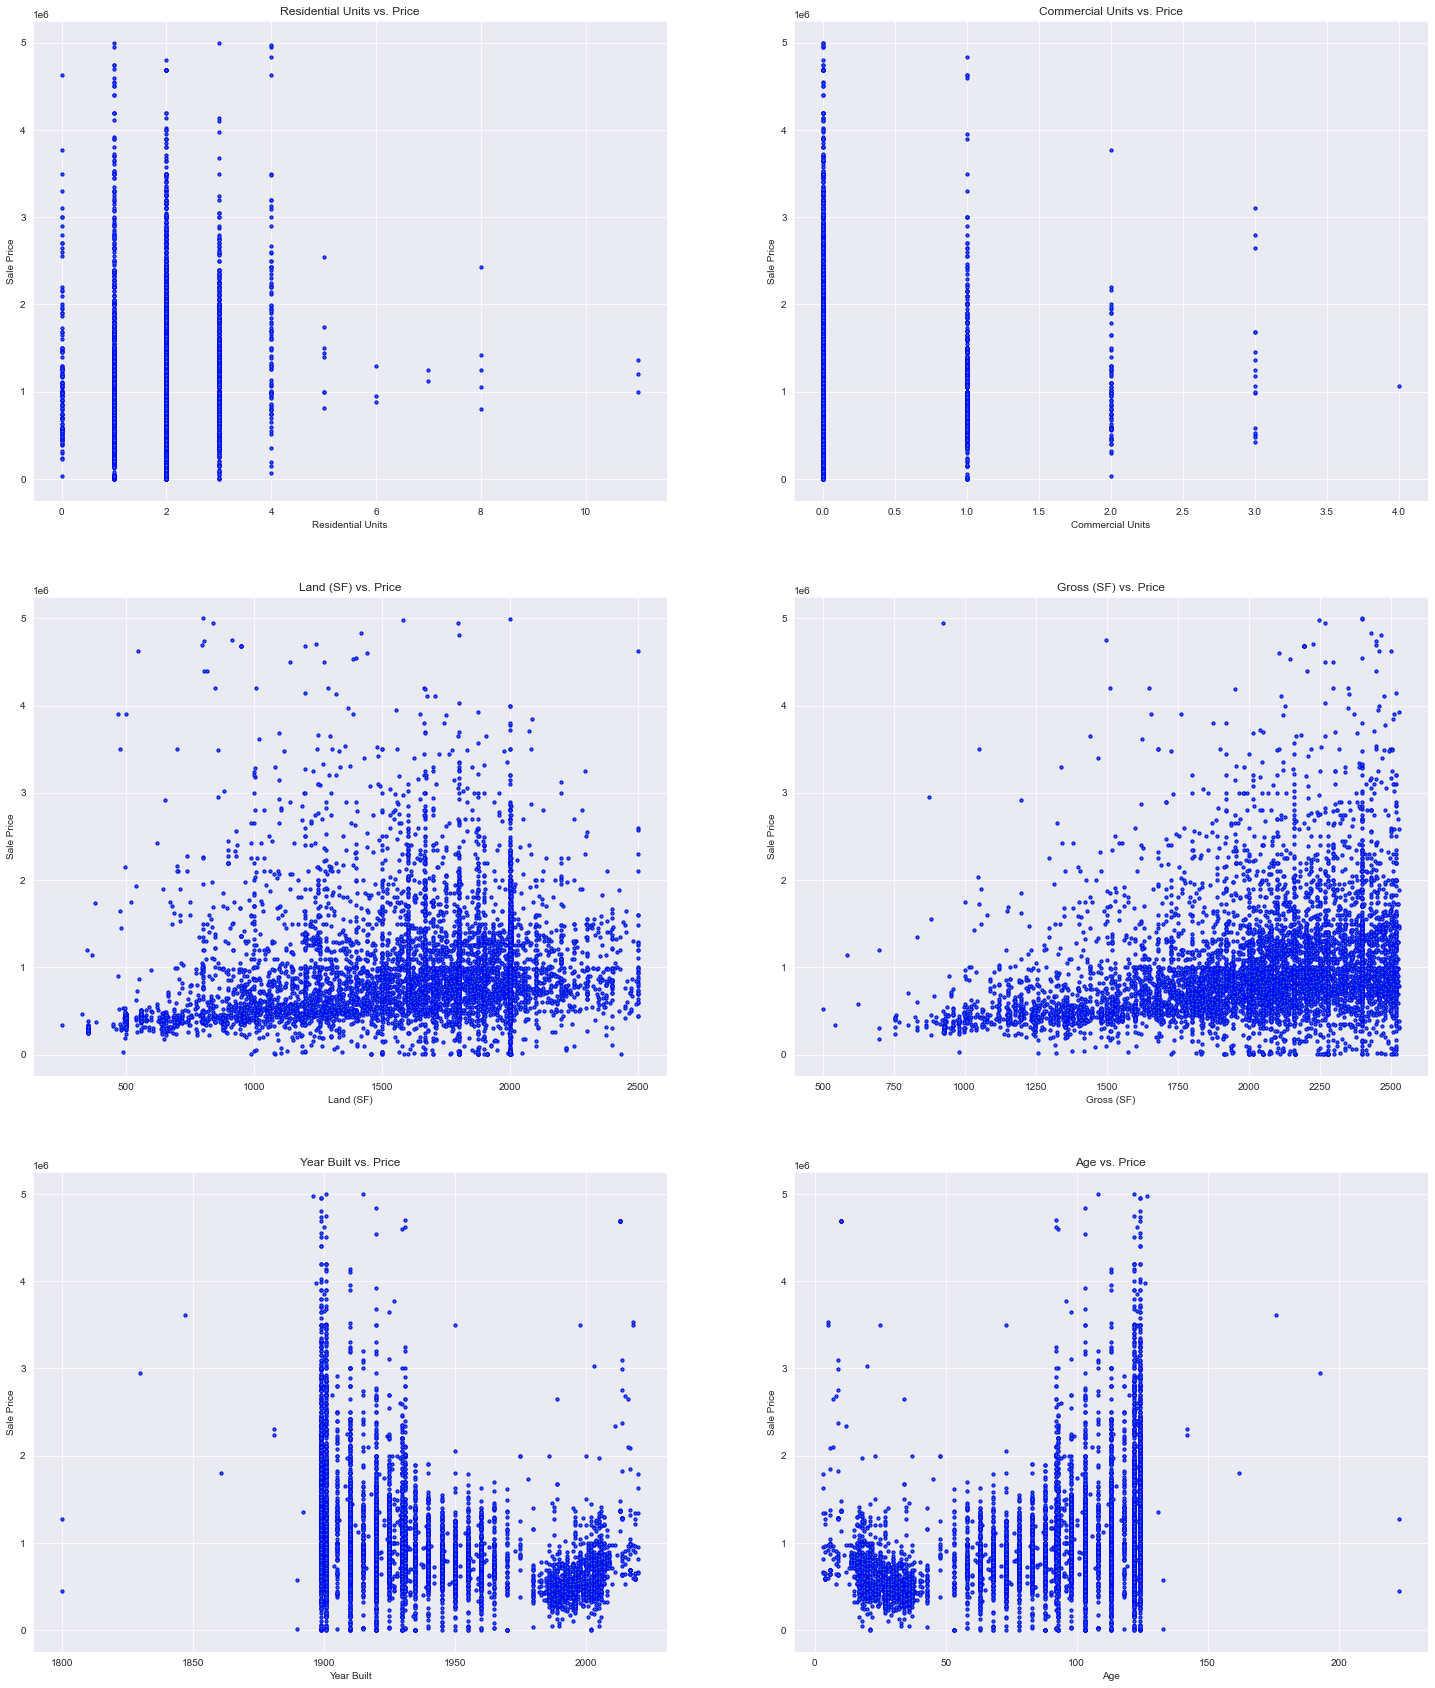

In [53]:
#Suplots of numeric features vs sales price
sns.set_style('darkgrid')
f, axes = plt.subplots(3,2, figsize = (25,30))

# Plot residential units 
axes[0,0].scatter(x = 'RESIDENTIAL UNITS', y = 'SALE PRICE', data = df_part2, edgecolor = 'b', s = 10)
axes[0,0].set_xlabel('Residential Units')
axes[0,0].set_ylabel('Sale Price')
axes[0,0].set_title('Residential Units vs. Price')

# Plot commercial units 
axes[0,1].scatter(x = 'COMMERCIAL UNITS', y = 'SALE PRICE', data = df_part2, edgecolor = 'b', s = 10)
axes[0,1].set_xlabel('Commercial Units')
axes[0,1].set_ylabel('Sale Price')
axes[0,1].set_title('Commercial Units vs. Price')

# Plot land square feet
axes[1,0].scatter(x = 'LAND SQUARE FEET', y = 'SALE PRICE', data = df_part2, edgecolor = 'b', s = 10)
axes[1,0].set_xlabel('Land (SF)')
axes[1,0].set_ylabel('Sale Price')
axes[1,0].set_title('Land (SF) vs. Price')

# Plot gross square feet
axes[1,1].scatter(x = 'GROSS SQUARE FEET', y = 'SALE PRICE', data = df_part2, edgecolor = 'b', s = 10)
axes[1,1].set_xlabel('Gross (SF)')
axes[1,1].set_ylabel('Sale Price')
axes[1,1].set_title('Gross (SF) vs. Price')

# Plot year built
axes[2,0].scatter(x = 'YEAR BUILT', y = 'SALE PRICE', data = df_part2, edgecolor = 'b', s = 10)
axes[2,0].set_xlabel('Year Built')
axes[2,0].set_ylabel('Sale Price')
axes[2,0].set_title('Year Built vs. Price')

# Plot age
axes[2,1].scatter(x = 'AGE', y = 'SALE PRICE', data = df_part2, edgecolor = 'b', s = 10)
axes[2,1].set_xlabel('Age')
axes[2,1].set_ylabel('Sale Price')
axes[2,1].set_title('Age vs. Price')


#### Insights

- There is a slight positive correlation between the gross square footage of a property and the sale price. This should be expected and makes sense if the property is larger in area.

- There appears to be a general negative correlation between sale price and when the property was built. Newer properties appear to be cheaper than older properties.



## Correlation

Text(0.5, 1.0, 'Variable Correlation')

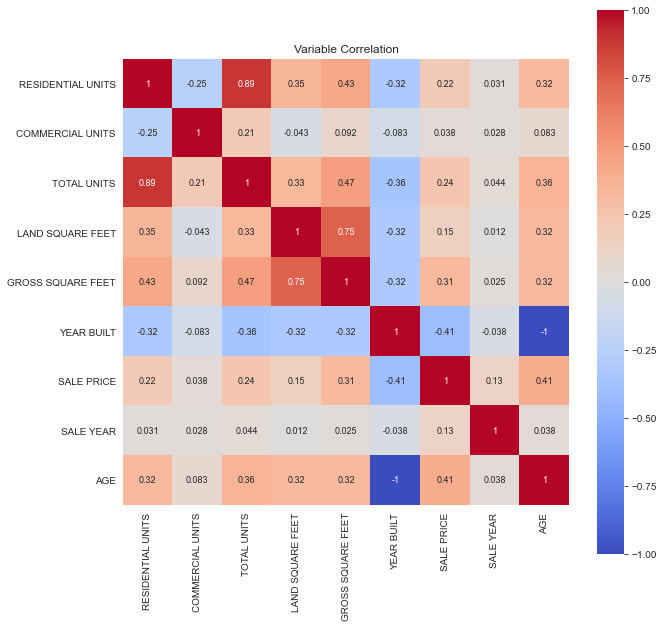

In [54]:
#correlation matrix
corrmat = df_part2.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, cmap = 'coolwarm', square=True, annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')


#### Weak Positive Correlation

- Residential Units and Price

- Total Units and Price

- Gross Square Feet and price

##### Moderate Positive Correlation

- Age and Price

As can be expected, increases in total units or residentail units is positively correlated with total and gross square footage of a property.


## Some More Categorical Value Analysis

Text(0.5, 1.0, 'Sales per borough_Residential')

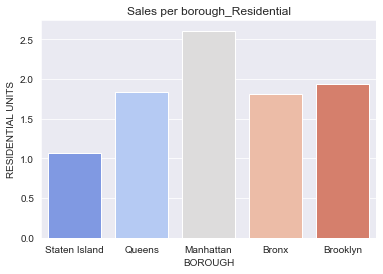

In [55]:
sns.barplot(y='RESIDENTIAL UNITS', x='BOROUGH',data=df_part2, palette='coolwarm', ci=None)
plt.title('Sales per borough_Residential')

- Residential Units are mostly sold in Manhattan within these years

Text(0.5, 1.0, 'Sales per borough_Commercial')

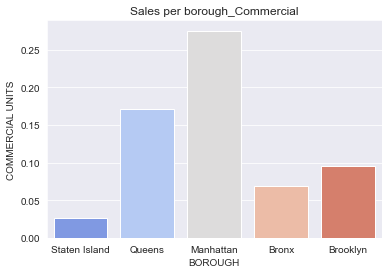

In [56]:
sns.barplot(y='COMMERCIAL UNITS', x='BOROUGH',data=df_part2, palette='coolwarm', ci=None)
plt.title('Sales per borough_Commercial')

- Commercial Units are also mostly sold in Manhattan

In [57]:
df_part2[(df_part2['BOROUGH'] =='Queens') & (df_part2['SALE PRICE'] != 0)].count()

BOROUGH                           1417
NEIGHBORHOOD                      1417
BUILDING CLASS CATEGORY           1417
TAX CLASS AT PRESENT              1417
BLOCK                             1417
LOT                               1417
BUILDING CLASS AT PRESENT         1417
ADDRESS                           1417
RESIDENTIAL UNITS                 1417
COMMERCIAL UNITS                  1417
TOTAL UNITS                       1417
LAND SQUARE FEET                  1417
GROSS SQUARE FEET                 1417
YEAR BUILT                        1417
TAX CLASS AT TIME OF SALE         1417
BUILDING CLASS AT TIME OF SALE    1417
SALE PRICE                        1417
SALE DATE                         1417
SALE MONTH                        1417
SALE YEAR                         1417
AGE                               1417
dtype: int64

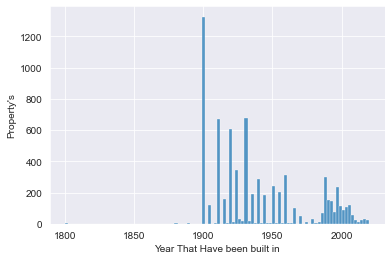

In [58]:
sns.histplot(df_part2[df_part2['YEAR BUILT']!=0]['YEAR BUILT'],bins=100);
plt.ylabel("Property's")
plt.xlabel("Year That Have been built in");

In [59]:
df_part2[df_part2['YEAR BUILT']!=0]['YEAR BUILT'].value_counts()

1910    669
1899    649
1901    647
1920    609
1930    441
       ... 
1897      1
2012      1
1847      1
1964      1
1861      1
Name: YEAR BUILT, Length: 112, dtype: int64

- The above graph and values mean that most of the properties that sold or been transationed were built between 1910 to 1950. 

## Year Over Year Analysis

Text(0.5, 1.0, 'Sales Rate from 2020-2022')

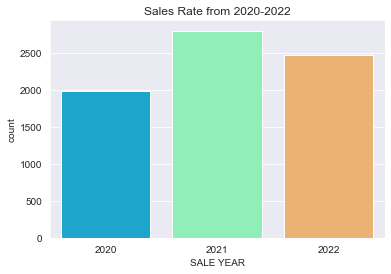

In [60]:
sns.countplot(x='SALE YEAR', data=df_part2, palette='rainbow')
plt.title('Sales Rate from 2020-2022')

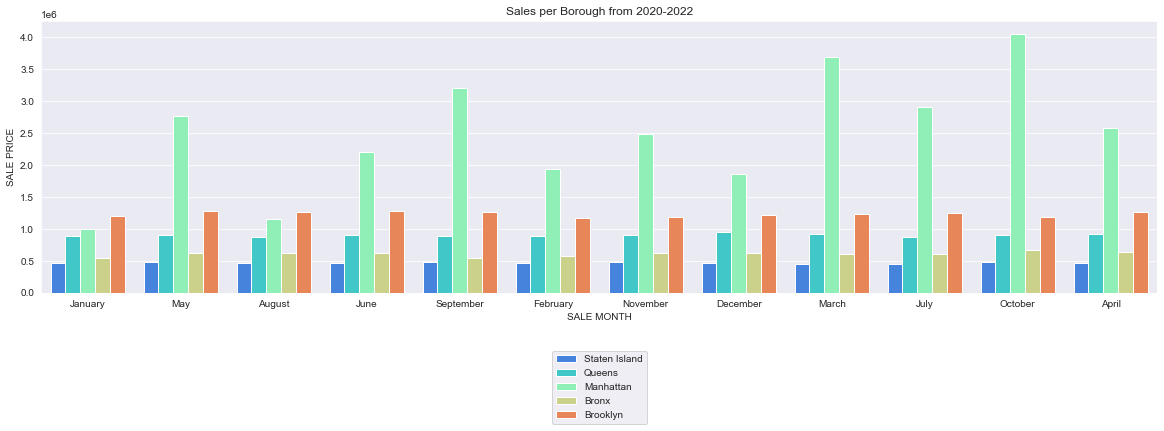

In [61]:
plt.figure(figsize=(20,5))
sns.barplot(x='SALE MONTH', y='SALE PRICE', hue='BOROUGH', data=df_part2, palette='rainbow', ci=None)
plt.title('Sales per Borough from 2020-2022')
plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.5))

/Users/masoodahmed/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SALE MONTH', ylabel='count'>

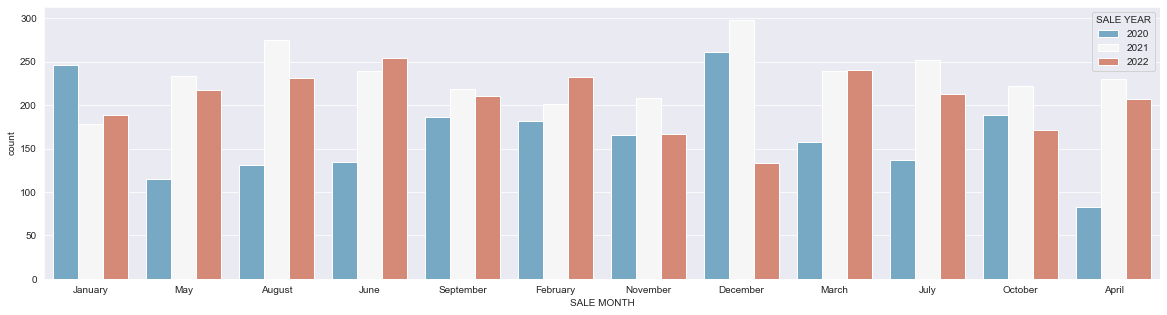

In [62]:
plt.figure(figsize=(20,5))
sns.countplot('SALE MONTH', hue='SALE YEAR', data=df_part2, palette='RdBu_r')

- It is noticed that though the number of sales remained almost same from the year 2020 to 2021, the sales prices per Borough(location) seemed to be rising from 2020-2022.
- Also, the property prices are much higher at Manhattan than at any other location.

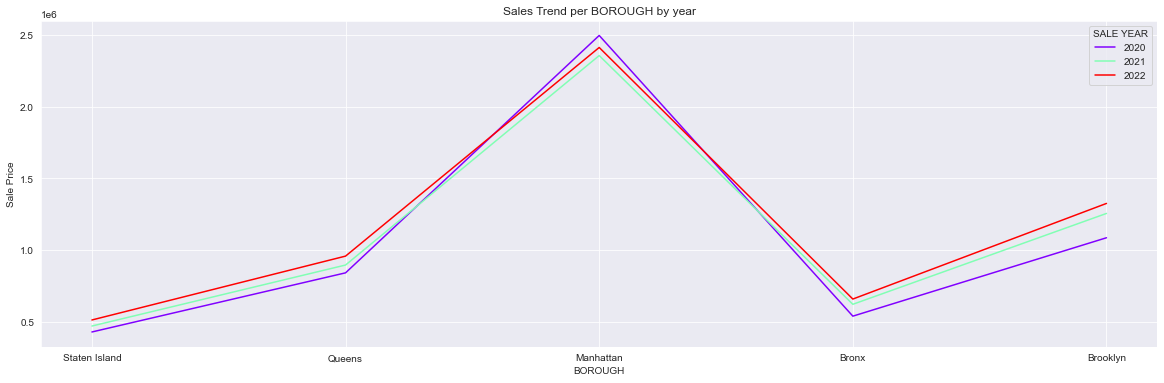

In [63]:
plt.figure(figsize=(20,6))
sns.lineplot(x="BOROUGH",y="SALE PRICE",hue='SALE YEAR',data=df_part2, palette='rainbow',ci=None)
plt.title('Sales Trend per BOROUGH by year');
plt.ylabel('Sale Price');

This shows the comparison in years of sales for each borough. Obviously Manhattan had better sales in 2022 than 2020, while sales were almost same for all other boroughs.

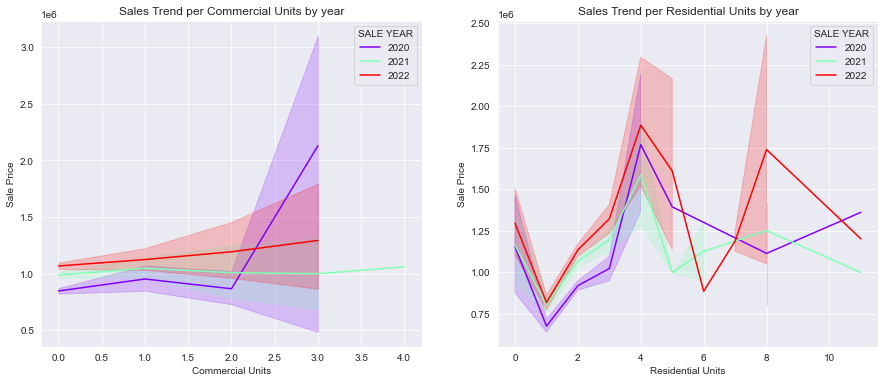

In [64]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.title('Sales Trend per Commercial Units by year')
sns.lineplot(x="COMMERCIAL UNITS",y="SALE PRICE",hue='SALE YEAR',data=df_part2, palette='rainbow')
plt.ylabel('Sale Price')
plt.xlabel('Commercial Units') 
plt.subplot(1, 2, 2)
plt.title('Sales Trend per Residential Units by year')
sns.lineplot(x="RESIDENTIAL UNITS",y="SALE PRICE",hue='SALE YEAR',data=df_part2, palette='rainbow')
plt.ylabel('Sale Price')
plt.xlabel('Residential Units');


- This explain how Residential units makes more sales in 2022 than 2020 or 2021.

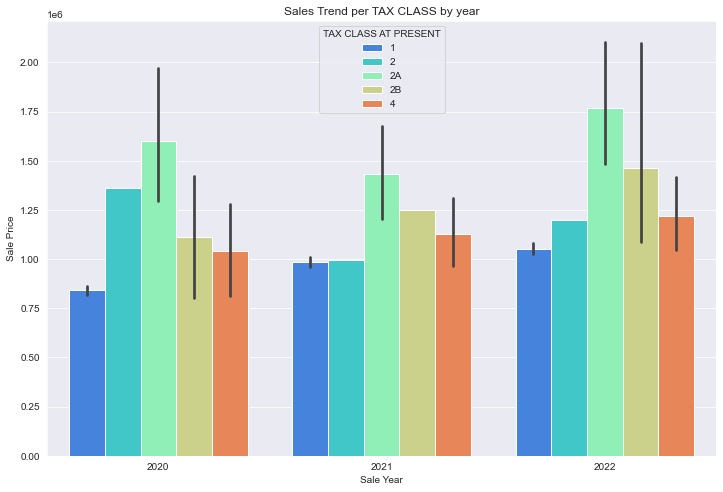

In [65]:
plt.figure(figsize=(12,8))
plt.title('Sales Trend per TAX CLASS by year')
sns.barplot(x="SALE YEAR",y="SALE PRICE",hue='TAX CLASS AT PRESENT',data=df_part2[df_part2['TAX CLASS AT PRESENT']!= ' '], palette='rainbow');
plt.xlabel('Sale Year')
plt.ylabel('Sale Price');

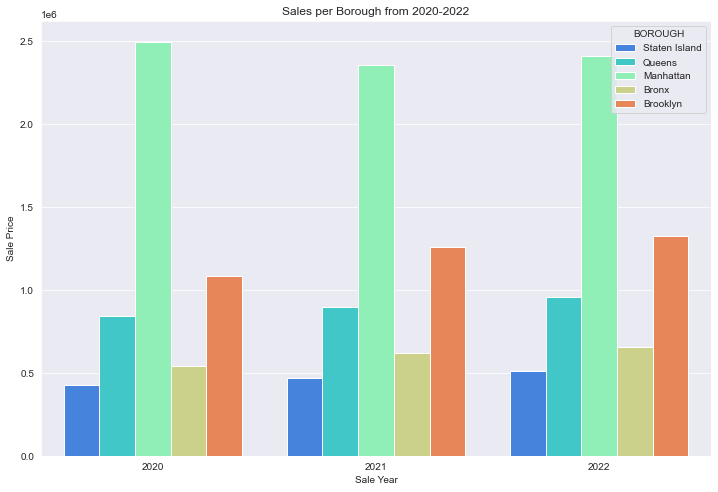

In [66]:
plt.subplots(figsize=(12,8))
sns.barplot(x='SALE YEAR', y='SALE PRICE', hue='BOROUGH', data=df_part2, palette='rainbow', ci=None)
plt.title('Sales per Borough from 2020-2022')
plt.ylabel('Sale Price')
plt.xlabel('Sale Year');

so we know that manhattan has the most revenue but by this chart we can tell in which order the all five borough share in the total revenue by 2020 and 2022 and it's as followsin descending order ( Manhattan , Brooklyn, Bronx, Queens, Staten Island)

##  Bivariate Analysis:

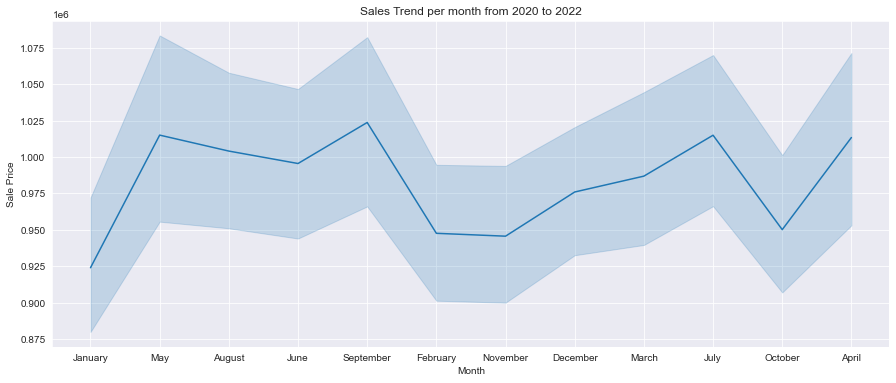

In [67]:
plt.figure(figsize=(15,6))
sns.lineplot(x='SALE MONTH',y='SALE PRICE',data=df_part2)
plt.title('Sales Trend per month from 2020 to 2022')
plt.ylabel('Sale Price')
plt.xlabel('Month')
plt.show();

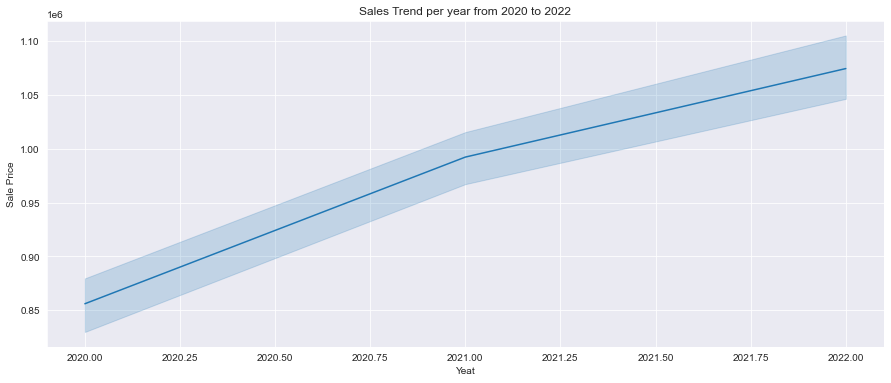

In [68]:
plt.figure(figsize=(15,6))
sns.lineplot(x='SALE YEAR',y='SALE PRICE',data=df_part2)
plt.title('Sales Trend per year from 2020 to 2022')
plt.ylabel('Sale Price')
plt.xlabel('Yeat')
plt.show();

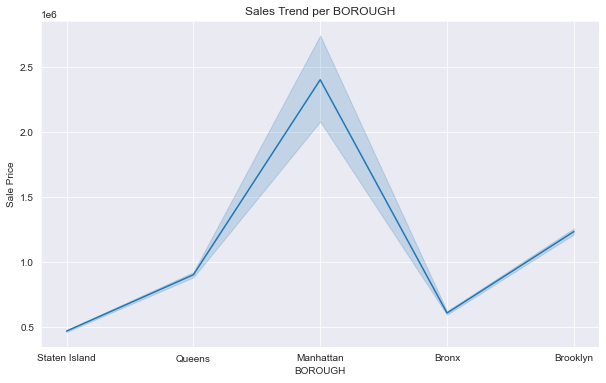

In [69]:
plt.figure(figsize=(10,6))
sns.lineplot(x='BOROUGH',y='SALE PRICE',data=df_part2)
plt.title('Sales Trend per BOROUGH')
plt.ylabel('Sale Price')
plt.show();

as we saw before Manhattan has the highest sales we need to work on marketing for property's in queens and staten island cause they are have the lowest sales of all

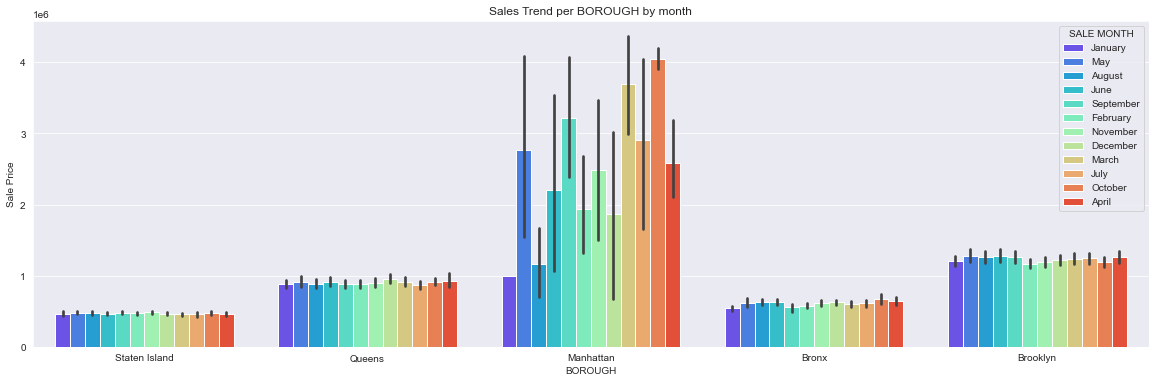

In [70]:
plt.figure(figsize=(20,6))
sns.barplot(x='BOROUGH', y='SALE PRICE', hue='SALE MONTH', data=df_part2, palette='rainbow');
plt.title('Sales Trend per BOROUGH by month')
plt.ylabel('Sale Price')
plt.show()

    March and December are the largest sales month in Manhattan in years 2020 and 2022
    January is the smallest sales month in Manhattan in years 2020 and 2022

In [71]:
df_part2['RESIDENTIAL UNITS'].sum(),df_part2['COMMERCIAL UNITS'].sum(),df_part2['TOTAL UNITS'].sum()

(12806, 709, 13515)

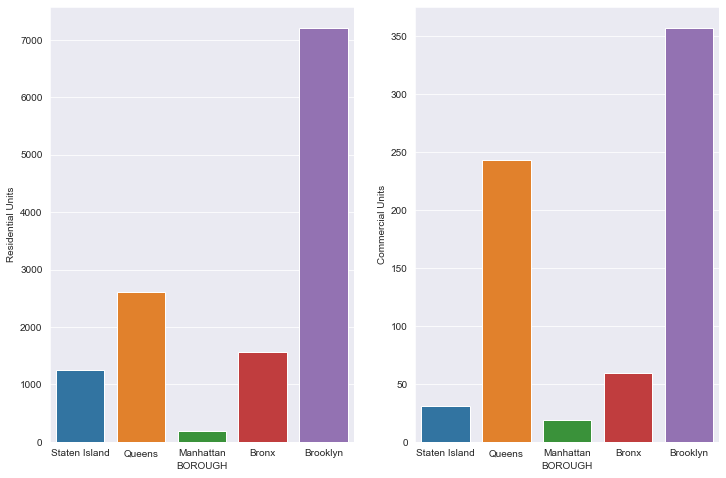

In [72]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
sns.barplot(x="BOROUGH", y="RESIDENTIAL UNITS", data=df_part2, estimator=sum, ci=None)
plt.ylabel('Residential Units')
plt.subplot(1, 2, 2)
sns.barplot(x="BOROUGH", y="COMMERCIAL UNITS", data=df_part2, estimator=sum, ci=None)
plt.ylabel('Commercial Units');

Residential units scale have a huge scale difference from Commercial units in number of propeties that have been sold

## Linear Regression

# Based on the results and preprocessing data from Section 3, randomly split your selected dataset into training and testing sets. 80% for training, and the remaining 20% for testing. Answer the following questions:

In [73]:
df_regression = new_df.copy()
print(df_regression.shape)
df_regression.head(10)

(7245, 21)


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,SALE YEAR,AGE
0,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,1,0,...,1845,1854,1986,1,A5,480000,2020-01-14,January,2020,37
1,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,1,6219,14,A5,90 LORRAINE AVENUE,1,0,...,1650,1700,2004,1,A5,580000,2020-05-01,May,2020,19
2,Staten Island,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5725,26,A5,135 KENILWORTH AVENUE,1,0,...,1135,1540,1995,1,A5,375000,2020-01-13,January,2020,28
3,Staten Island,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5727,30,A5,82 KENILWORTH AVENUE,1,0,...,1230,1540,1995,1,A5,435000,2020-08-28,August,2020,28
4,Staten Island,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5740,11,A5,69 ILYSSA WAY,1,0,...,500,1354,1996,1,A5,380000,2020-06-09,June,2020,27
5,Staten Island,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5740,33,A5,127 ILYSSA WAY,1,0,...,500,1354,1996,1,A5,359000,2020-09-25,September,2020,27
6,Staten Island,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5740,49,A5,365 ASPEN KNOLLS WAY,1,0,...,353,929,1996,1,A5,255000,2020-09-15,September,2020,27
7,Staten Island,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5740,58,A5,343 ASPEN KNOLLS WAY,1,0,...,500,1354,1996,1,A5,357200,2020-06-02,June,2020,27
8,Staten Island,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5740,59,A5,341 ASPEN KNOLLS WAY,1,0,...,500,1354,1996,1,A5,357000,2020-02-10,February,2020,27
9,Staten Island,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5740,96,A5,177 ASPEN KNOLLS WAY,1,0,...,500,1354,2000,1,A5,360000,2020-05-21,May,2020,23


In [74]:
df_regression['BUILDING CLASS CATEGORY'] = df_regression['BUILDING CLASS CATEGORY'].astype(str)
df_regression['BUILDING CLASS CATEGORY'] = df_regression['BUILDING CLASS CATEGORY'].str[:2]
df_regression['BUILDING CLASS CATEGORY'] = df_regression['BUILDING CLASS CATEGORY'].astype(int)

In [75]:
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 
    'September':9, 'October':10, 'November':11, 'December': 12}
df_regression['SALE MONTH'] = df_regression['SALE MONTH'].map(d)

In [76]:
# Split
df_regression['BOROUGH'].replace({'Manhattan':1,'Bronx':2,'Brooklyn':3,'Queens':4,'Staten Island':5},inplace=True)

# Create features variable (Picking features) 
X = df_regression[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
                'GROSS SQUARE FEET', 'YEAR BUILT', 'AGE', 'BOROUGH', 'BUILDING CLASS CATEGORY',
                'SALE MONTH', 'TAX CLASS AT TIME OF SALE', 'SALE YEAR']]

# Create target variable
y = df_regression['SALE PRICE']

# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [77]:
# creating a separate dataframe with independant variables to detect multicollinearity

new_regression_df = df_regression[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
                'GROSS SQUARE FEET', 'YEAR BUILT', 'AGE', 'BOROUGH', 'BUILDING CLASS CATEGORY',
                'SALE MONTH', 'TAX CLASS AT TIME OF SALE', 'SALE YEAR']].copy()
new_regression_df.head()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,AGE,BOROUGH,BUILDING CLASS CATEGORY,SALE MONTH,TAX CLASS AT TIME OF SALE,SALE YEAR
0,1,0,1,1845,1854,1986,37,5,1,1,1,2020
1,1,0,1,1650,1700,2004,19,5,1,5,1,2020
2,1,0,1,1135,1540,1995,28,5,1,1,1,2020
3,1,0,1,1230,1540,1995,28,5,1,8,1,2020
4,1,0,1,500,1354,1996,27,5,1,6,1,2020


In [78]:
new_regression_df.corr()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,AGE,BOROUGH,BUILDING CLASS CATEGORY,SALE MONTH,SALE YEAR
RESIDENTIAL UNITS,1.000000,-0.248108,0.893821,0.347492,0.428393,-0.315933,0.315933,-0.333429,-0.050987,-0.032916,0.030880
COMMERCIAL UNITS,-0.248108,1.000000,0.212638,-0.042522,0.091982,-0.083357,0.083357,-0.027125,0.612098,0.024032,0.028308
TOTAL UNITS,0.893821,0.212638,1.000000,0.330821,0.474686,-0.357257,0.357257,-0.348876,0.231909,-0.022077,0.044251
LAND SQUARE FEET,0.347492,-0.042522,0.330821,1.000000,0.749553,-0.318419,0.318419,-0.373991,0.046311,-0.005326,0.011509
GROSS SQUARE FEET,0.428393,0.091982,0.474686,0.749553,1.000000,-0.317692,0.317692,-0.413702,0.145299,-0.003168,0.025450
YEAR BUILT,-0.315933,-0.083357,-0.357257,-0.318419,-0.317692,1.000000,-1.000000,0.496718,-0.104899,0.007071,-0.037858
AGE,0.315933,0.083357,0.357257,0.318419,0.317692,-1.000000,1.000000,-0.496718,0.104899,-0.007071,0.037858
BOROUGH,-0.333429,-0.027125,-0.348876,-0.373991,-0.413702,0.496718,-0.496718,1.000000,-0.104187,0.001421,-0.030160
BUILDING CLASS CATEGORY,-0.050987,0.612098,0.231909,0.046311,0.145299,-0.104899,0.104899,-0.104187,1.000000,0.010629,0.053760
SALE MONTH,-0.032916,0.024032,-0.022077,-0.005326,-0.003168,0.007071,-0.007071,0.001421,0.010629,1.000000,-0.063072


In [79]:
# We will use cut-off value of 0.9 to represent multicollinearity as suggested in the slides
abs(new_regression_df.corr()) > 0.9

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,AGE,BOROUGH,BUILDING CLASS CATEGORY,SALE MONTH,SALE YEAR
RESIDENTIAL UNITS,True,False,False,False,False,False,False,False,False,False,False
COMMERCIAL UNITS,False,True,False,False,False,False,False,False,False,False,False
TOTAL UNITS,False,False,True,False,False,False,False,False,False,False,False
LAND SQUARE FEET,False,False,False,True,False,False,False,False,False,False,False
GROSS SQUARE FEET,False,False,False,False,True,False,False,False,False,False,False
YEAR BUILT,False,False,False,False,False,True,True,False,False,False,False
AGE,False,False,False,False,False,True,True,False,False,False,False
BOROUGH,False,False,False,False,False,False,False,True,False,False,False
BUILDING CLASS CATEGORY,False,False,False,False,False,False,False,False,True,False,False
SALE MONTH,False,False,False,False,False,False,False,False,False,True,False


There might be multicollinearity existing in the these pairs (YEAR BUILT and AGE)

As suggested in the lecture slides: If model is used for prediction only, do nothing to handle multicollinearity

In [80]:
# Fit - BaseLine Model
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train,y_train)

LinearRegression()

In [81]:
# Predict
# Predicting test set results
y_pred = regressor.predict(X_test)

In [82]:
# Score It
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 381021.1168058977
MSE: 323274389614.87024
RMSE: 568572.2378158031


RMSE tells us explicitly how much our predictions deviate, on average, from the actual values in the dataset. In this case, the predicted values are $512,857.45 away from the actual value.

In [83]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.23950398661002337


According to the R-squared, 21.9% of the variance in the dependent variable is explained by the model.

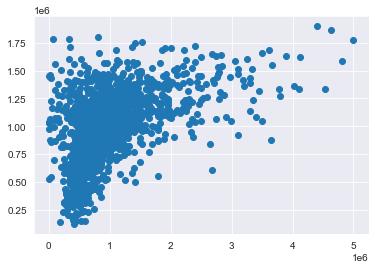

In [84]:
#Actual v predictions scatter
plt.scatter(y_test, y_pred)

/Users/masoodahmed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

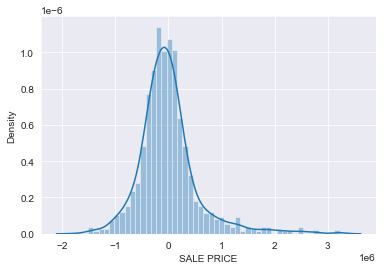

In [85]:
#Histogram of the distribution of residuals
sns.distplot((y_test - y_pred))

#### Interpretting the Coefficients

In [86]:
cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
RESIDENTIAL UNITS,68723.997176
COMMERCIAL UNITS,-122701.884548
TOTAL UNITS,-53977.887373
LAND SQUARE FEET,-399.391205
GROSS SQUARE FEET,648.698152
YEAR BUILT,-3246.738577
AGE,3246.738577
BOROUGH,-19550.813846
BUILDING CLASS CATEGORY,-10036.638224
SALE MONTH,3609.052272



## Conclusions

Every one unit increase in:

- Residential Units is associated with a increase in Sale Price by 68723.997176 dollars
- Commercial Units is associated with a decrease in Sale Price by -122701.884548 dollars
- Total Units is associated with a decrease in Sale Price by -53977.887373 dollars
- Land Square Foot is associated with a decrease in Sale Price by -399.391205 dollars
- Gross Square Foot is associated with a increase in Sale Price by 648.698152 dollars
- Year Built is associated with a decrease in Sale Price by -3246.738577 dollars
- Age is associated with a increase in Sale Price by 3246.738577 dollars
- Borough is associated with a decrease in Sale Price by -19550.813846 dollars
- Building class category is associated with a decrease in Sale Price by -10036.638224 dollars
- Sale month is associated with a increase in Sale Price by 3609.052272 dollars
- Tax class at time of sale is associated with a increase in Sale Price by 198631.374641 dollars
- Sale Year is associated with a increase in Sale Price by 92803.698746 dollars


## ------------------------------------------------------------